# What Makes a Game Successful

We are back in December 2016. I stepped into a role of an analyst for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I need to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan an advertising campaign for 2017. 

## Content <a id='content'></a>

[Introduction](#intro)

[Dataset](#dataset)

[Data overview](#data_overview)

[Data preprocessing](#preprocessing)

[EDA - revealing user patterns](#eda)

[SDA - Hypotheses testing](#sda)

[Summary and conclusions](#conclusions)

## Introduction <a id = "intro"> <a/>

The ultimate goal stated for the project is, based on the last year sales data, to determine the most successful platforms/genres/games and make recommendations with regard to the hotspots and the target audience of the next year's advertising canpaign.

We have not been provided with any preliminary hypothesis or information regarding the data quality; therefore, we will have to carefully study the data, evaluate its quality and see how significant its issues are and what are appropriate ways to fix them. It will be safe to assume that the project will involve some data preprocessing: we account for the most critical problems (identify and fill in missing values, cast data types according to the needs of the project, delete duplicate data and categorize the data). Next stage will be EDA: we will take care, as much as it will be possible, to check and compensate for issues that might arise, besides of data being incomplete or duplicated: such as mistakes in the recording values and major artifacts which can find their way into the data and  will require additional thought to enable further hypotheses testing. Next, we will analyse the cleaned data across different parameters, look at its variability and correlations between the variables. The next stage is to come up with and test hypotheses with regard to the popularity of different platforms, genres, and possibly individual games. The last stage is making an overview of the findings and writing recommendations on the adjustments which can be made to the advertising budget. Thus, the project will consist of five stages:

 1. Data overview;
 2. Data preprocessing/transformation;
 3. Exploratory data analysis;
 4. Statistical data analysis;
 5. Summary and conclusions.

[Back to Content](#content)

## Dataset <a id='dataset'> <a/>

The initial dataset is set to include the following parameters:

- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating ([ESRB](https://www.esrb.org/ratings-guide/), the Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature)

Let's start exploring it.

[Back to Content](#content)

## 1. Data overview <a id = 'data_overview'> <a/>

### Load libraries

We start with importing the necessary libraries and loading the data. If additional libraries are needed, we will add them to the next cell also and update it.

In [1]:
# Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # We will need this for visualisations
%matplotlib inline
import seaborn as sns
from scipy import stats # We will need this in case we want to make some statistical checks
from scipy.stats import gaussian_kde

# To filter out automatic comments on plots from Jupyter (not affecting the output)
import warnings
warnings.filterwarnings("ignore") 

### Load initial data

In [2]:
# function `load` for a csv load with try-except
def load(filename):
    try:
        df_raw = pd.read_csv(filename)
    except:
        df_raw = pd.read_csv('/'+filename)
    return df_raw

In [3]:
# Load the calls file into a DataFrame
games_raw = load('datasets/games.csv')
games_raw.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


[Back to Content](#content)

### Explore initial data <a id = 'explore'> <a/>

Let's see how many rows the dataset has, whether there are duplicates and/or issues with column names, and what the data types of the columns are.

In [4]:
# Define a dictionary for all the datasets to simplify sequential checks
dataset_dict = {'raw': games_raw}

In [5]:
# Define `raw_shape` function to print the shape of a dataframe
def raw_shape(df):
    raw_shape = df.shape
    print(f'length - {raw_shape[0]}; width - {raw_shape[1]}')

In [6]:
# Run a check for shapes, duplicates, and column names for each dataset
for key in dataset_dict:
    # header
    print('\n'+key+' dataframe shape:'+'\n'+'-'*(len(key) + 17))
    # df under consideration
    df = dataset_dict[key]
    # info
    raw_shape(df)
    print('duplicate number:', df.duplicated().sum(),'\n')
    print('missing values check:')
    print(df.isna().sum()/len(df),'\n')
    for col in list(df.columns):
        print(f"column name: '{col}'; column type: {df[col].dtype}")


raw dataframe shape:
--------------------
length - 16715; width - 11
duplicate number: 0 

missing values check:
Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64 

column name: 'Name'; column type: object
column name: 'Platform'; column type: object
column name: 'Year_of_Release'; column type: float64
column name: 'Genre'; column type: object
column name: 'NA_sales'; column type: float64
column name: 'EU_sales'; column type: float64
column name: 'JP_sales'; column type: float64
column name: 'Other_sales'; column type: float64
column name: 'Critic_Score'; column type: float64
column name: 'User_Score'; column type: object
column name: 'Rating'; column type: object


Let's check how many platforms and genres we are talking about:

In [7]:
len(games_raw['Platform'].unique())

31

In [8]:
len(games_raw['Genre'].unique())

13

Let's check what are the release years of the games under consideration:

In [9]:
col = games_raw['Year_of_Release']

print(col.min(), col.max(), len(col.unique()))

1980.0 2016.0 38


We will perform additional check to make sure the games in the sample are indeed unique:

In [10]:
col_names = games_raw.columns.to_list()[:3]
col_names

['Name', 'Platform', 'Year_of_Release']

In [11]:
games_raw[games_raw[col_names].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


The last one, let's see what exactly the `Rating` values are and how many games there are in each category:

In [12]:
rating_cat = games_raw.pivot_table(index = 'Rating', values = 'Name', aggfunc = ['count']).reset_index()

In [13]:
rating_cat.columns = ['rating', 'count']

In [14]:
rating_cat.sort_values(by = 'count', ascending = False)

,rating,count
1,E,3990
7,T,2961
5,M,1563
2,E10+,1420
3,EC,8
4,K-A,3
6,RP,3
0,AO,1


### Intermediate conclusions and further steps

To sum up the findings from the numbers above:
1. At our disposal is a dataset on, presumably, 16715 games, including two presumable duplicates for further investigation.
2. The games' release years span over 37 years and for 1.6% the release year is missing.
3. These are games in 13 genres for 31 platform.
4. For appr. 50% of the dataset the critic rating is lacking, and for appr. 40% the user and the ESRB score are lacking (N.B. 99.9% of the games were assigned to one of four ESRB categories, `everyone`, `teen`, `mature`, and `everyone 10+`, more on this [here](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)).
5. There are minor issues with column names (uppercase) and, as mentioned above, at least two cases to make additional check for duplicates.
6. In addition, there are missing values in `Name` and `Genre` for 0.012% of the games (presumably one).
7. The data type of most of the columns is `float64` and `object`, including `Year_of_Release` (`float64`) and `User_Score` (`object`); the latter two should be fixed for the sake of the analysis below; additionally, the `Rating` variable can be considered as categorical.

Further steps:
1. Fix the column names and convert the relevant columns to more appropriate types.
2. Explore the data for potential errors and artifacts other than missing values.
3. Fix the missing values (if possible);
5. Perform exploratory data analysis, including deeper investigation into distributions of games over release years, platforms, and genres; sales over regions; and the input of reviews / ratings to the sales.
4. Test hypotheses, presumably on the popularity of different platforms and genres among users.
5. Elaborate on findings and write conclusions.

[Back to Content](#content)

## 2. Data Preprocessing <a id="preprocessing"> <a/>

### Column names <a id = "col_names"> <a/>

In [15]:
col_names = {}
for name in games_raw.columns.to_list():
    col_names[name] = name.lower()
games_raw.rename(columns = col_names, inplace = True)
games_raw.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### `year_of_release` type <a id = "year_type"> <a/>

`year_of_release` is of float64 type instead int, let's fix it:

In [16]:
# Convert float to date when there are NaN values in the column
games_raw['year_of_release']=pd.to_datetime(games_raw['year_of_release'], format = '%Y')
games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [17]:
games_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### `user_score` type <a id = "user_score_type"> <a/>

`object` type of presumably float variable points at the presence of string values in some rows for this variable, let's try and check whether we can reveal what the problem is.

In [18]:
games_raw['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We see, besides NaN, there is a `tbd` value presumably meaning "to be defined"; thus, we will use `to_numeric()` method with `error` parameter equal `coerce` to transform the non-numeric values into NaN:

In [19]:
# Convert float to int when there are NaN values in the column
games_raw['user_score'] = pd.to_numeric(games_raw['user_score'], errors='coerce')
# check the resulting dataframe column types
games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### `rating` type <a id = "rating_type"> <a/>

Let's recap on the `rating` categories:

In [20]:
rating_cat.sort_values(by = 'count', ascending = False)

,rating,count
1,E,3990
7,T,2961
5,M,1563
2,E10+,1420
3,EC,8
4,K-A,3
6,RP,3
0,AO,1


In [21]:
len(games_raw['rating'].unique())

9

There are 8 categories plus `NaN` values with four categories accounting for about 0.1% of the dataset. It is [known](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) that `K-A` category was substituted with `E` category, while `RP` stands for `rating pending` which essentially means NaN; thus, we can replace it as well:

In [22]:
games_raw['rating'] = games_raw['rating'].replace(to_replace='K-A', value='E')
games_raw['rating'] = games_raw['rating'].replace(to_replace='RP', value=np.nan)

In [23]:
# checking the number of `rating` categories
len(games_raw['rating'].unique())

7

Due to insufficient count, we will keep in mind we can drop those games labeled `AO` and `EC` later; meanwhile, let's take a look at them:

In [24]:
games_raw.query('rating == "AO" or rating == "EC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005-01-01,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
4297,Nickelodeon Team Umizoomi,DS,2011-01-01,Action,0.42,0.00,0.0,0.03,NaN,NaN,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010-01-01,Misc,0.35,0.00,0.0,0.02,NaN,NaN,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010-01-01,Misc,0.27,0.00,0.0,0.02,NaN,NaN,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005-01-01,Adventure,0.12,0.09,0.0,0.03,NaN,7.0,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009-01-01,Misc,0.19,0.00,0.0,0.01,NaN,NaN,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005-01-01,Adventure,0.09,0.02,0.0,0.00,NaN,NaN,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010-01-01,Misc,0.05,0.00,0.0,0.00,NaN,NaN,EC
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010-01-01,Misc,0.04,0.00,0.0,0.00,NaN,NaN,EC


In [25]:
games_raw['rating'] = games_raw['rating'].astype('category')
games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9946 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), object(3)
memory usage: 1.3+ MB


[Back to Content](#content)

### Potential errors and artifacts <a id = "errors"> <a/>

#### Duplicates  <a id = 'dup'> <a/>

Earlier, we have seen two duplicate rows, with NaN (from 1993) and `Madden NFL 13` (from 2012) as the `name` variable value. Let's check them out.

In [26]:
games_raw[games_raw['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These two rows suggest two thoughts:
1. Looks like without name any datapoint cannot not be too informative and helpful for our analysis, so we should drop it.
2. A deeper look at this `GEN` platform and associated release years is necessary.

Let's drop the NaN names first thing:

In [27]:
games_raw = games_raw.dropna(subset=['name'])

Now, we will take a closer look at the `GEN` platform.

In [28]:
# the subset of games with `GEN` as a platform
games_gen = games_raw.query('platform == "GEN"')

In [29]:
# number of these games
len(games_gen)

27

In [30]:
# release years of these games
print(games_gen['year_of_release'].min(), games_gen['year_of_release'].max())

1990-01-01 00:00:00 1994-01-01 00:00:00


In [31]:
games_gen.describe().T

,count,mean,std,min,25%,50%,75%,max
na_sales,27.0,0.713704,1.113132,0.0,0.000,0.00,1.025,4.47
eu_sales,27.0,0.204444,0.317845,0.0,0.000,0.00,0.335,1.20
jp_sales,27.0,0.098889,0.086128,0.0,0.035,0.07,0.145,0.31
other_sales,27.0,0.032963,0.050598,0.0,0.000,0.00,0.050,0.19
critic_score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 29 games with `GEN` as their platform with release years spanning from 1990 to 1994, with at least 50% with no or sales in the U.S. or Europe or other sales, except Japan, none of which has scores and ratings. Let's take a look at the titles.

In [32]:
games_gen

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992-01-01,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991-01-01,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992-01-01,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990-01-01,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992-01-01,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994-01-01,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994-01-01,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992-01-01,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994-01-01,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN
1453,Mortal Kombat 3,GEN,1994-01-01,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN


Let's make a little excercise in regex and check whether there are cases of implicit duplicates, by checking, for example, the game instances whith similar names.

In [33]:
# the name includes "Sonic" in the beginning and 2 at the end
games_raw[games_raw['name'].str.contains('^Sonic.*2')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992-01-01,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
601,Sonic Adventure 2 Battle,GC,2001-01-01,Platform,1.70,0.59,0.21,0.07,73.0,8.3,E
971,Sonic Advance 2,GBA,2002-01-01,Platform,0.93,0.59,0.21,0.07,83.0,8.3,E
1280,Sonic Rivals 2,PSP,2007-01-01,Racing,0.44,0.67,0.00,0.37,60.0,7.8,E
9844,Sonic Adventure 2,DC,2001-01-01,Platform,0.00,0.00,0.12,0.00,89.0,8.6,E
13571,Sonic the Hedgehog 2 (8-bit),GG,1992-01-01,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [34]:
# the name includes "Ecco" in the beginning
games_raw[games_raw['name'].str.contains('^Ecco')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9170,Ecco the Dolphin: Defender of the Future,PS2,2002-01-01,Adventure,0.07,0.05,0.00,0.02,71.0,8.5,E
9787,Ecco the Dolphin,GEN,1992-01-01,Adventure,0.00,0.00,0.12,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993-01-01,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN


In [35]:
# the name contains "Mortal" in the beginning and release year is 1994
games_mortal = games_raw[games_raw['name'].str.contains('^Mortal')]
games_mortal[games_mortal['year_of_release']==1994]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Looks like all the `name` - `platform` - `year_of_release`  tuples are unique, but the year values lead us to the idea to investigate the distribution of the `platform` variable by `year_of_release` variable.

[Back to Content](#content)

#### Dropping discontinued and simingly old platforms  <a id = 'platform_drop'> <a/>

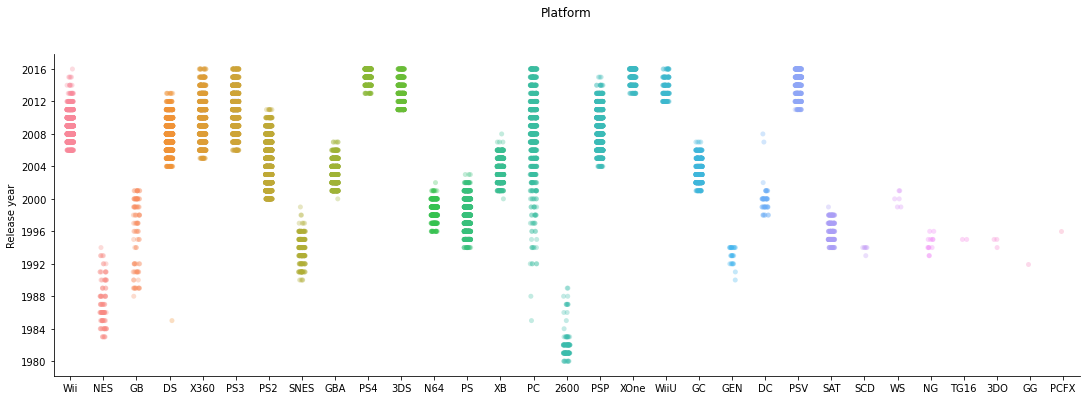

In [36]:
# excluding years with NULL values from the plotting
g = games_raw[games_raw['year_of_release'].notnull()]
# Plot
sns.catplot(x='platform', y='year_of_release', data=g, height=5, aspect=3, alpha = 0.3)
plt.xlabel("")
plt.ylabel("Release year")
plt.title("Platform", y=1.1)
plt.show()

It look like some of the platforms were discontinued, like `SNES`, `2600`, `SAT` and others, including the one called `GEN`, while for some of those discontinued had very few games released, like `SCD`, `NG`, `3DO`, and others; given we are talking about a promotion company for 2017, they can be dropped. Let's define the list of platforms to focus on, **given the ultimate goal of this project**: we will drop those, which were discontinued more than 10 years before 2017.


In [37]:
disc_df = pd.DataFrame(games_raw.groupby('platform')['year_of_release'].agg(['max']))
platform_to_keep = disc_df[disc_df['max'] > '2007-01-01'].index.to_list()

In [38]:
games = games_raw.query('platform in @platform_to_keep')

From the graph above, it will be safe to cocnlude that we can focus on the titles realeased no more than 20 years before 2017.

In [39]:
games = games[games['year_of_release'] > '1997-01-01']

Let's check the scatter plot of games by platforms and years again.

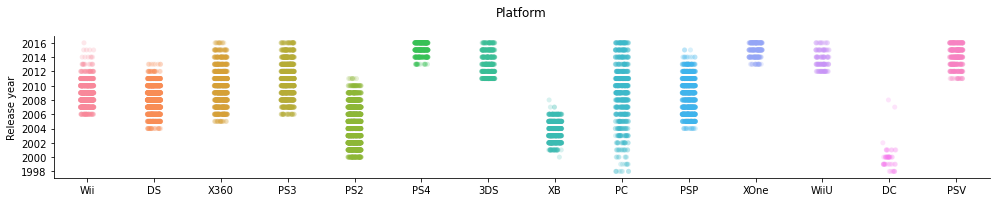

In [40]:
# Plot
sns.catplot(x = 'platform', y = 'year_of_release', data=games, height=2.5, aspect=5.5, alpha = 0.2)
plt.xlabel("")
plt.ylabel("Release year")
plt.title("Platform", y=1.1)
plt.show()

We can immediately see that there are only two games released after 2005 for the platform called `DC`:

In [41]:
games[(games['platform'] == 'DC') & (games['year_of_release'] > '2005-01-01')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14006,Pia Carrot e Youkoso!! 2.5,DC,2008-01-01,Adventure,0.0,0.0,0.04,0.0,NaN,NaN,NaN
15997,Triggerheart Exelica,DC,2007-01-01,Shooter,0.0,0.0,0.02,0.0,NaN,NaN,NaN


DC stands for Sega Dreamcast console, which was actually [discontinued in 2001](https://en.wikipedia.org/wiki/Dreamcast). Similar story with `XB`, which stands for the original version of XBox: XBox 360 (`X360`) was [released as the successor of the original Xbox in November 2005](https://en.wikipedia.org/wiki/Xbox). Thus, we can drop both `DC` and `XB`.

In [42]:
games = games[(games['platform'] != 'DC') & (games['platform'] != 'XB')]

Additionally, looks like we have only a small number of games in 1998 to 2000 for the `PC` plarform, let's check:

In [43]:
games_by_years = games.pivot_table(index = ['year_of_release', 'platform'], values = 'name', aggfunc = ['count']).reset_index()
games_by_years.columns = ['year', 'platform', 'game_count']
games_by_years['year'] = games_by_years['year'].dt.strftime('%Y')
games_by_years.sort_values(by='year').head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,17,14,15,16,19
year,1998,1999,2000,2000,2001,2001,2002,2002,2003,2003,2004,2004,2004,2004,2005,2005,2005,2005,2005,2006
platform,PC,PC,PC,PS2,PC,PS2,PC,PS2,PC,PS2,DS,PC,PS2,PSP,X360,PSP,DS,PC,PS2,DS
game_count,8,7,7,82,15,185,19,280,33,256,23,30,259,15,18,95,118,37,260,201


Right, we have 7 to 8 games in each 1998 and 1999 for `PC` platform; since it will not be helpful to analyse them neither for constructing the leader board, nor for restoring the missing values, we would better to drop 1998 and 1999 as well:

In [44]:
games = games[games['year_of_release']>'1999-01-01']

Let's check the info about the current state of the dataset:

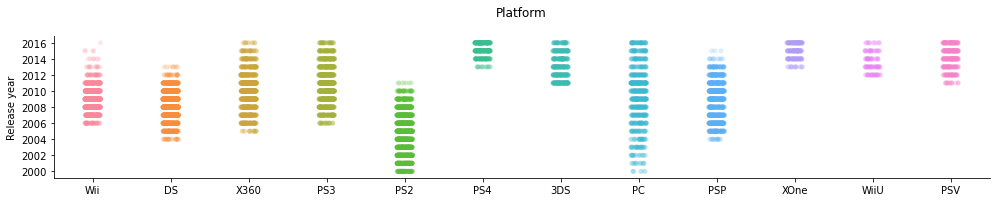

In [45]:
# Plot
sns.catplot(x = 'platform', y = 'year_of_release', data=games, height=2.5, aspect=5.5, alpha = 0.2)
plt.xlabel("")
plt.ylabel("Release year")
plt.title("Platform", y=1.1)
plt.show()

In [46]:
len(games)/len(games_raw)

0.7124992520792197

In [47]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11908 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             11908 non-null  object        
 1   platform         11908 non-null  object        
 2   year_of_release  11908 non-null  datetime64[ns]
 3   genre            11908 non-null  object        
 4   na_sales         11908 non-null  float64       
 5   eu_sales         11908 non-null  float64       
 6   jp_sales         11908 non-null  float64       
 7   other_sales      11908 non-null  float64       
 8   critic_score     6188 non-null   float64       
 9   user_score       6090 non-null   float64       
 10  rating           7841 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), object(3)
memory usage: 1.3+ MB


The resulting dataset covers 71.25% of the initial dataset over 12 (instead 31) most contemporary platforms; it does not have missing values other than in scores and ratings.

#### A word on platform generations <a id = 'platform_gen'> <a/>

One can notice, that __3 generations of the platforms__ can be extracted from the last graph:

- `PC` and `PS2` the first one;
- `Wii`, `DS`, `X360`, `PS3`, and `PSP` the second one (let's call it GENERATION 2);
- and `PS4`, `3DS`, `XOne`, `WiiU`, and `PSV` the third one ((let's call it GENERATION 3).

We will get [back to this finding later](#eda) during data exploration.

[Back to Content](#content)

#### Duplicates  (cont.) <a id = 'dup_cont'> <a/>

Let's get back to the second one of the duplicates mentiond in the beginning of this section:

In [48]:
games[games['name'].str.contains('^Madden.*13$')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012-01-01,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012-01-01,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012-01-01,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012-01-01,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


It turned out that there are two entries for `Madden NFL 13` released in 2012 on `PS3` platform, both entries have the same `critic_score`, `user_score`, and `rating` values, but the second one has zero or near zero sales values. Obviously, we can drop it.

In [49]:
games = games.drop(index=16230)

In [50]:
games[games['name'].str.contains('^Madden.*13$')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012-01-01,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012-01-01,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012-01-01,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012-01-01,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


[Back to Content](#content)

### Total sales variable <a id = "total_sales"> <a/>

As this step of data preprocessing, we wll calculate the total sales (the sum of sales in all regions) for each game and assign these values to a separate variable. Let's recap on the column names:

In [51]:
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


In [52]:
games['total_sales'] = ( games['na_sales'] +
                              games['eu_sales'] +
                              games['jp_sales'] +
                              games['other_sales'] )

In [53]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Fixing the missing values  <a id = "missing"> <a/>

Let's start with subsets for which only one of the score or rating variables has missing value. To restore the missing values in `critic_score` or `user_score` we will analyze their distribution for a "complete" data subset, where there are no missing values for corresponding variable, by `platform`, `year_of_release`, and `genre`, drawing upon the common sense that score patterns differ for variuos sub-groups of these variables. We will check our assumtion that the median will comprise a better indicator for a `score` than the mean (since there can be always outliers). Then, we will extract median `score` values for each of the resulting sub-groups and replace missing values with the mean or median using the fillna() method.

For each variable we will create a subset without missing values, which we will employ in what follows to make the estimates for restoring the missing values. Let's start with scores.

#### `critic_score` missing values  <a id = "critic_missing"> <a/>

In [54]:
# Choose the columns for treatment
games_critic_columns = games.columns.to_list()[:-3]
print(games_critic_columns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']


In [55]:
# Construct the dataset for mean / median estimates
games_critic_nn = games[games_critic_columns].dropna(subset=['critic_score'])
len(games_critic_nn)/len(games)

0.519610313261107

After excluding the missing values in the `critic_score` column, we are left with appr. 52% of the dataset under investigation, which is well enough. Let's take a look at the distribution.

In [56]:
games_critic_nn.describe().T

,count,mean,std,min,25%,50%,75%,max
na_sales,6187.0,0.377115,0.989412,0.0,0.05,0.13,0.36,41.36
eu_sales,6187.0,0.237616,0.710396,0.0,0.01,0.05,0.21,28.96
jp_sales,6187.0,0.059476,0.280180,0.0,0.00,0.00,0.01,6.50
other_sales,6187.0,0.089357,0.282201,0.0,0.01,0.03,0.08,10.57
critic_score,6187.0,68.806368,13.858973,13.0,60.00,71.00,79.00,98.00


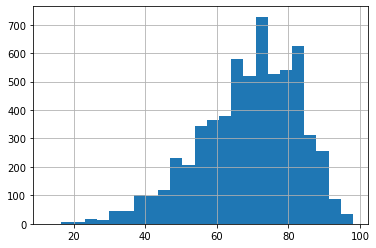

In [57]:
games_critic_nn['critic_score'].hist(bins = 25)
plt.show()

The mean and the median values for `critic_score` are pretty close, though the distribution is still left-skewed, so we will use the median as better approximation to fill in the missing values. In addition, there are no critical issues/artifacts in the distribution, let's move to grouping and median calculation and filling in the missing values.

[Back to Content](#content)

#### Applying multi-category sub-group medians to restore missing values  <a id = "col_sample_distr_by_cat"> <a/>

To recap, our intention is to calculate medians for subgroups of `platform`, `year_of_release`, and `genre` to receive better approximations. To this end, we will define a function, called `sub_group_stat`, which will filter sub-groups of interest from the subset without missing data, calculate the values of an aggregate stats function (median value in our case) on particular column, `critic_score` for example, and fill in the missing values for the same sub-groups in the initial dataset with corresponding aggregated values.

In [58]:
def sub_group_stat(df, group_list, column, func):
    """
    The sub_group_stat() function filters a sub-group from the subset without missing data,
    calculates the median value for particular numeric column,
    and replaces the missing values for the same sub-group in the initial dataset with this median value.

    The function takes 4 position paramaters:
     - df - the DataFrame of interest, DataFrame;
     - group_list - list of columns for grouping, for example:
             ['platform','year_of_release','genre'];
     - column - the column for which the stats function should be calculates, str;
     - func - the requested stats function, str.

    The function returns two DataFrames:
     - initial dataset with restored values for `column`;
     - func_df - a DataFrame with func and count values for every sub-group.

    """
    
    # the subset without NaNs in column
    df_nn = df.dropna(subset=[column])
    # number of columns to group by
    gl = len(group_list)
    
    
    # calculate a DataFrame with func values for every sub-group
    # consists of Series on columns from group_list + the resulting column after applying func on column
    func_df = pd.DataFrame(df_nn.groupby(group_list, as_index=False)[column].agg([func, 'count']))
    print(f'Number of sub-groups equals {len(func_df)}; average number of games per group is {int(len(df_nn)/len(func_df))}.')
            
    # for each row of func_df, the DataFrame with sub-groups and func values for every sub-group
    # e.g. ["bachelor's degree", 'F', '20-29', 23481.1275]
    for i in range(0,len(func_df)):
        #the starting subset of all entries with missing values in column
        filtered_df = df[df[column].isna()]
        # filter entries with the same set of parameters as in the current sub-group i
        
        for j in range(0,gl):
            if gl > 1:
                # for tuples
                filter_val = func_df.iloc[i].name[j]
            else:
                # for gl = 1
                filter_val = func_df.iloc[i].name
            filtered_df = filtered_df[filtered_df[group_list[j]]==filter_val] 
        # fill in missing values with the func column value for the current sub-group i
        filtered_df[column] = filtered_df[column].fillna(func_df.iloc[i].to_list()[0]) #the median el of the row i agg list
        # append the resulting DataFrame to the intial subset without NaNs
        df_nn = df_nn.append(filtered_df, ignore_index=True)
    print(f"The target aggregate function value varies between {func_df['median'].min()} and {func_df['median'].max()}.")
    
    # currently df_nn has all the missing values (for column variable) filled in
    return df_nn,func_df

Now let's try applying the `sub_group_stat()` function for the `critic_score` column and try different sub-groups.

In [59]:
# the list of columns to group by from the largest number of the sub-groups to the lowest number of the sub-groups
# group_list = ['platform','year_of_release', 'genre']
# group_list = ['year_of_release', 'genre']
# group_list = ['platform','genre']
group_list = ['platform','year_of_release']
# group_list = ['year_of_release']
# group_list = ['platform']

column = 'critic_score'
func = 'median'

# we create a new DataFrame to not interfere with the initial dataset
games_v1,func_df = sub_group_stat(games, group_list,column,func)

Number of sub-groups equals 98; average number of games per group is 63.
The target aggregate function value varies between 61.0 and 89.0.


After checking several options for sub-grouping, the only grouping, which results in sufficiently large sub-groups to perform aggregate estimates, is by the `platform` and `year_of_release` variables. The median values of `critic_score` for different sub-groups vary between 61.0 and 91.5. Let's check the `info()` for our dataset and compare distributions of the `critic_score` variable before and after filling in the missing values.

In [60]:
games_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             11664 non-null  object        
 1   platform         11664 non-null  object        
 2   year_of_release  11664 non-null  datetime64[ns]
 3   genre            11664 non-null  object        
 4   na_sales         11664 non-null  float64       
 5   eu_sales         11664 non-null  float64       
 6   jp_sales         11664 non-null  float64       
 7   other_sales      11664 non-null  float64       
 8   critic_score     11664 non-null  float64       
 9   user_score       6036 non-null   float64       
 10  rating           7756 non-null   category      
 11  total_sales      11664 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7), object(3)
memory usage: 1014.1+ KB


<a id="multi_cat_sub_group_dist"> <a/>

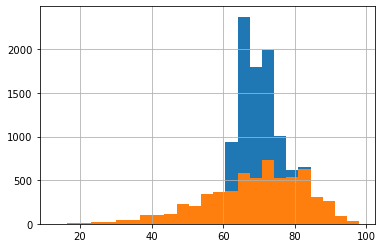

In [61]:
# plot the distribution to check whether its form is distorted as compared to the initial one
games_v1['critic_score'].hist(bins = 25)
games_critic_nn['critic_score'].hist(bins = 25)

plt.show()

We have ended up with obviously distorted distribution and lost around 250 titles with `critic_score` missing values, for which no estimate was found. it looks, like we need to try another approach. Let's just generate additional values from the sample distribution of corresponding variable, i.e. to fill in the missing values in `critic_score` variable for example, we will generate a sample of values which will be randomly chosen from the distribution of the `critic_score` variable for that subset of `games` dataframe without missing values.

[Back to Content](#content)

#### Approaching sample distributions to restore missing values  <a id = "sample_distr_restore_missing"> <a/>

Before we proceed, let's take the `critic_score` sample distribution as an example and check how it differs depending on the categorical parameters of games. To this end, we will construct the following plotting function.

In [62]:
# Define a function plotting boxplots of a `col` variable for categorical variables from `plot_list`
def col_sample_boxplots_by_cat(df, col, plot_list):
    """
    col_sample_boxplots_by_cat() function takes a dataframe, a continuous variable name and
    a list of categorical variables and creates a boxplot for that continuos variable
    for each categorical variable.
    
    The function takes 3 position paramaters:
     - df - the DataFrame of interest, DataFrame;
     - col - the column for which the boxplot is created, str;
     - plot_list - the required list of categorical variables, list.

    The function plots boxplots, their number equals the length of the plot_list.
    
    """

    for i in range(0,len(plot_list)):
        
        df_plot = df[[plot_list[i], col]]
        
        # formating the y-ticks
        tl = games.genre.str.len().max() # max lenght of a tick string
        
        if plot_list[i] == 'year_of_release':
            df_plot['year_of_release'] = tl*' ' + df_plot['year_of_release'].dt.strftime('%Y').astype('str')
        elif plot_list[i] == 'platform':
            df_plot['platform'] = tl*' ' + df_plot['platform']

        g = sns.catplot(y=plot_list[i], x=col, data=df_plot, kind = 'box', height=4.2, aspect=3.8, orient="h")

       
        plt.xlabel("")
        plt.ylabel("{}".format(' '.join(plot_list[i].split('_')), labelpad=15))
        plt.title(f"Distribution of {' '.join(col.split('_'))} by {' '.join(plot_list[i].split('_'))}", y=1)
    plt.show()

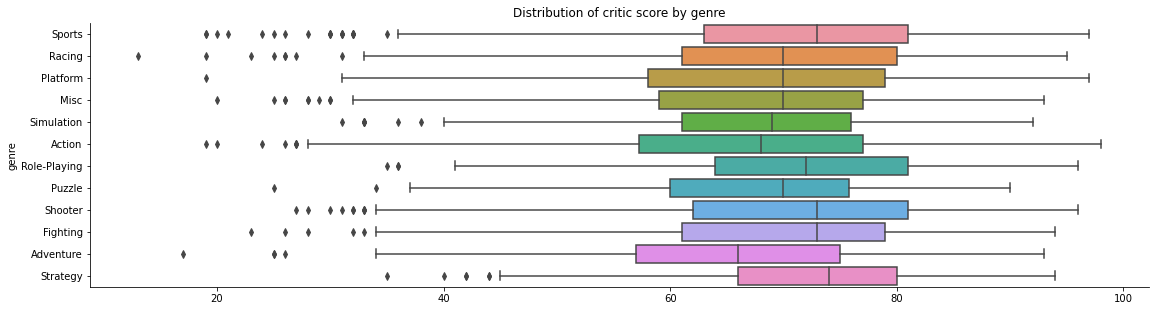

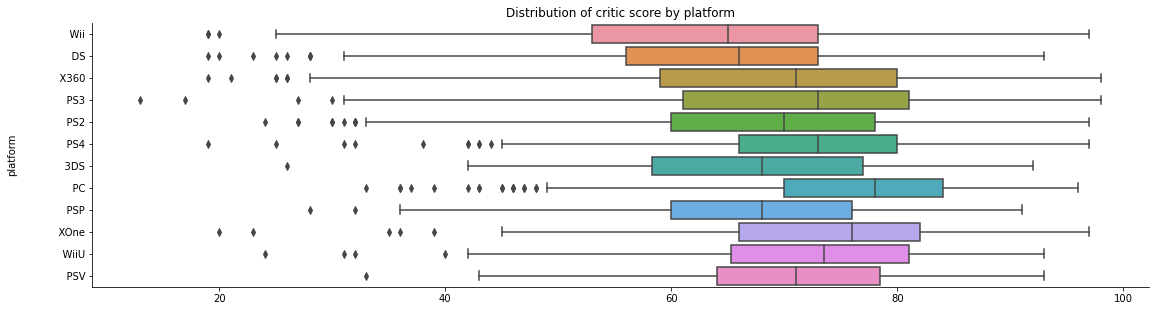

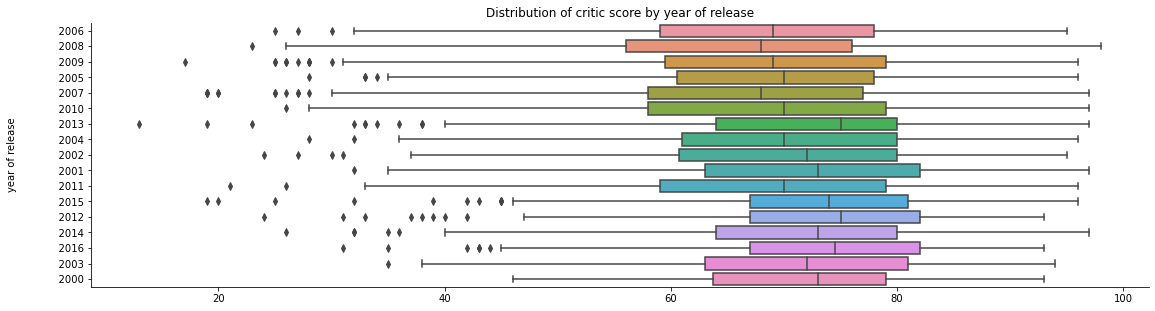

In [63]:
# categorical variables for exploration
plot_list = ['genre', 'platform', 'year_of_release']
# boxplots for `critic_score`
col_sample_boxplots_by_cat(games,'critic_score', plot_list)

We see that distributions vary by categories for each categorical variable and the `platform` variable demonstrates the highest variability of quantile values; thus, the option of using category-wise sample distributions for restoring the missing values seems to be more benefitial. Let's create a fuction to implement this approach and apply it to the `critic_score`, `user_score`, and `rating` variables (it will equally work both for numerical and categorical variables).

<a id = "kde_experiments"> <a/>

In [64]:
# for the sake of experiment
from sklearn.neighbors import KernelDensity

In [65]:
def fill_missing_by_cat(df, col, cat_col, kde_option = 'tophat'):
    """
    The fill_missing_by_cat() function calculates sample distributions for the `col` variable over categories in `cat_col`
    from the subset without missing data, generates an array of random values from the resulting distirbution,
    and creates a subset of the `games` dataframe where the missing values in `col` are replaced with this array.

    The function takes three position paramaters and 1 key parameter:
     - df - the DataFrame of interest, DataFrame;
     - col - the column for which the missing values should be filled in, str;
     - cat_col - the categorical variable for category-wise sampling based on the subset
                 game titles for which the `col` variable values are available, str;
     - kde_option - kde option for estimating the distribution of continuous variables,
                    either 'gaussian' or 'tophat' kernel; non-scalar bandwidth values are available with
                    gaussian kernel (scipy.stats function), tophat kernel is realized in KernelDensity
                    in sklearn, but only scalar values for bandwidth are covered.

    The function returns one DataFrame:
     - a subset of the `df` dataset with restored values for `column`.
    """
    
    cat_list = list(df[cat_col].unique())
    df_col_nn = df.dropna(subset = [col])
    df_temp = pd.DataFrame()
            
    # for each category ....
    for cat in cat_list:
        # extract the subset of the df dataframe for the category
        dfc = df[df[cat_col]==cat]
        # count the number of missing values
        num_col_nans = dfc[col].isna().sum()
        
        if num_col_nans != 0:
        
            if str(dfc[col].dtypes) == 'category':
                # calculate the sample distribution for the `col` variable
                col_dist = dfc[col].value_counts(normalize=True).reset_index()


                # print the number of missing values
                #print(f'Total number of values in the category `{cat}`: {len(dfc)}, missing for `{col}`: {num_col_nans}.')
                # generate an array of lenght `num_col_nans` of randomly chosen values - 1D
                sample = np.random.choice(col_dist['index'].to_list(), num_col_nans, p = col_dist[col])
                

            elif (str(dfc[col].dtypes) == 'float64') or (str(dfc[col].dtypes) == 'int64'):
                
                # make kde distribution for the `col` variable
                
                values = dfc[col].dropna()
                
                # making 1-dimensional array of values for fitting the kde function
                values = pd.array(values)
                values = [values]
                
                if kde_option == 'gaussian':
                    # option 1 - gaussian kernel, bandwidth - scott, silverman or scalar
                    kde = stats.gaussian_kde(values, bw_method = 'silverman')
                    sample = kde.resample(num_col_nans)
                
                else:
                    # option 2 - tophat kernek, bandwidth - scalar
                    kde = KernelDensity(kernel='tophat', bandwidth=1).fit(values)
                    # generate a 2D array of `num_col_nans` X len(values)
                    sample = kde.sample(num_col_nans)
                
                # first component is a 1D array of lenght `num_col_nans` of KDE sampled values
                sample = pd.Series(sample[0])



            # take the part of the initial dataframe with missing values in the `col` variable
            dfc_col_nan = dfc[dfc[col].isna()]
            # reset index to support matching on the next step
            dfc_col_nan.reset_index(drop=True, inplace=True)
            # fill in the missing values in the category
            dfc_col_nan[col] = sample

            # append the category with restored missing values for `col` to the subset without missing values
            df_temp = df_temp.append(dfc_col_nan)
              
            
    return df_temp

[Back to Content](#content)

#### Applying category-wise sampling to restore missing values  <a id = "restore_missing"> <a/>

To fully squeeze the `fill_missing_by_cat()` function, we will run it for every combination of `col` and `cat_col` variables and, for every `col` variable, choose the pair which works best for it. To this end, we will define a plotting function, which will take a dataframe, a list of variables to fill in missing values (`col_list`) and a list of categorical variables (`cat_list`), and for a particular variable with missing values, run the `fill_missing_by_cat()` function for every categorical variable on the `cat_list` list, saving the resulting subset of the intial dataframe with the missing values filled in and plotting corresponding sampling and sampled distributions.

In [66]:
def col_sampled_dist_by_cat(df, col_list, cat_list, kde_option = 'tophat'):
    """
    col_sampled_dist_by_cat() function takes a dataframe, the name (`col) of the variable to fill in missing values
    and a list of categorical variables and compares the sampling and the sampled distributions of the `col` variable
    for each categorical variable on the list.
    
    The function takes 3 position paramaters:
     - df - the DataFrame of interest, DataFrame;
     - col - the name of the column for which the values are sampled to fill in the missing values, str;
     - plot_list - the required list of categorical variables, list.

    The function plots histograms for sampling and sampled distributions;
    their number equals the length of the plot_list.
    
    """
    # Define a dectionary to store the resulting `games` subsets
    games_full = {}

    for j in range(0,len(col_list)):
        
        col_key = col_list[j]
        games_full[col_key] = {}
        
        plt.figure(figsize=(18, 3))
        
        for i in range(0,len(cat_list)):
            cat_key = cat_list[i]
            if kde_option == 'gaussian':
                games_full[col_key][cat_key] = fill_missing_by_cat(df, col_key, cat_key, kde_option = 'gaussian')
            else:
                games_full[col_key][cat_key] = fill_missing_by_cat(df, col_key, cat_key)
            sampling_df = df.dropna(subset = [col_key])
            sampled_df = games_full[col_key][cat_key]
            
                        
            plt.subplot(1, len(cat_list), i + 1)
            plt.title(f"categories by '{cat_key}' variable")
            plt.hist(col_key, data = sampling_df, bins=50, alpha = 0.7, rwidth=0.9)
            plt.hist(col_key, data = sampled_df,  bins=50, alpha = 0.7, rwidth=0.7)
            
            plt.ylabel('count')
            plt.xlabel(col_key)
            plt.legend(['sampling values', 'sampled values'])
            plt.suptitle(f"Distribution of sampled vs. sampling values for the '{col_key}' variable", y = 1.15, fontsize = 16)
            
    return games_full


Now we are ready to restore the missing values in the three variables in the following list:

In [67]:
col_list = ['critic_score', 'user_score', 'rating']

We have created the list of the categorical variables earlier, so let's apply the `col_sampled_dist_by_cat()` function!

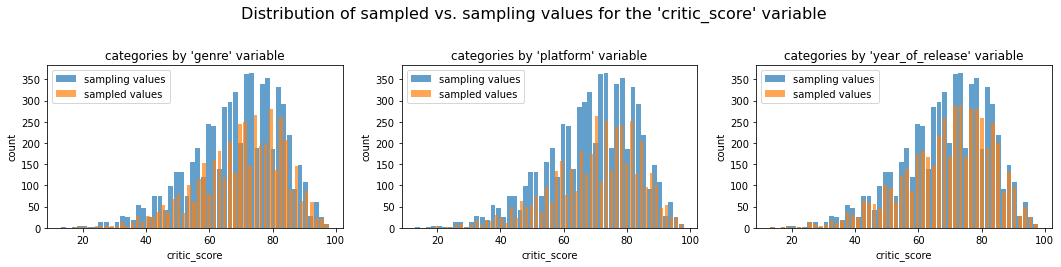

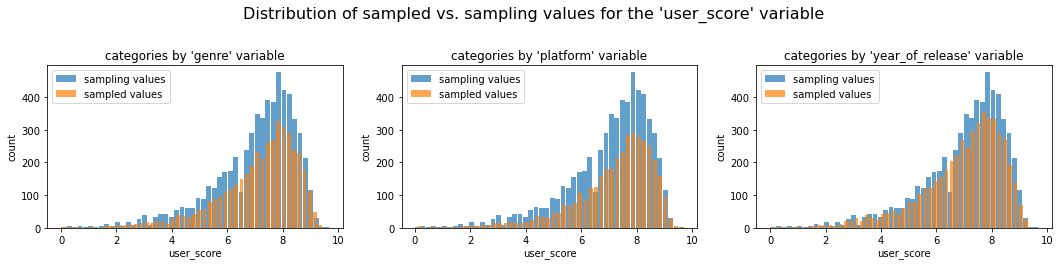

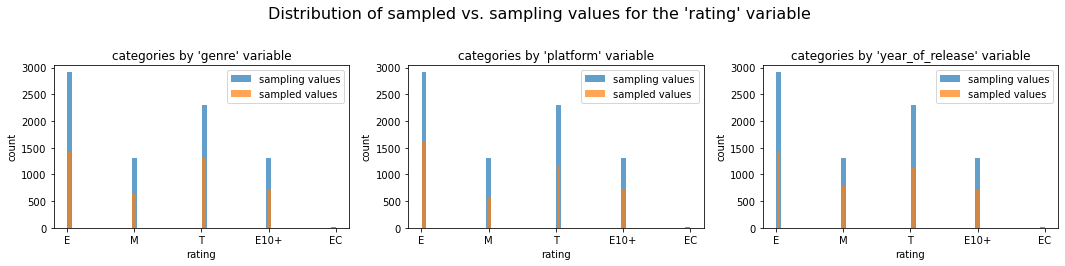

In [68]:
games_restored = col_sampled_dist_by_cat(games, col_list, plot_list)

For each variable, for which the missing values are to be restored, there is a different pair from the list of categorical variables which result in better approximation of the sampling distribution form. From the resulting sampled distributions we can conclude, that sampling by `year_of_release` results in the sampled distribution of `critic_score` values which form is the closest the one of the sampling distribution; sampling by `genre` works better for restoring the `user_score` values; and sampling by `platform` or `year_of_release` works better for restoring the missing values in `rating`. It could be a nice idea to ask for advice from an industry expert, but for now, we will use common sense to draw conclusions - it seems to be safe to say the following:

- the _release year_ has more impact on the critics' opinion (they should be comparing between newly issued items);
- _platform_ correlates more with users' opinion than `genre` (users pf a particular platform can tend to like particular genres more);
- based on this [source](https://playgroundprofessionals.com/play/games-and-gaming/video-game-ratings-what-know-your-kid-starts-playing), we will accept that the ESRB rating depends more on the _platform_ (though one can expect it to depend on the genre, but obviously the resulting distribution does not support such assumption).

Based on this logic, we will employ the `fill_missing_by_cat()` function to calculate the final dataset.

[Back to Content](#content)

#### restoring `critic_score` missing values in `games` <a id = "critic_restored"> <a/>

In [69]:
col = 'critic_score'
cat = 'year_of_release'
games_final = games.dropna(subset = [col]).append(fill_missing_by_cat(games, col, cat))
games_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             11907 non-null  object        
 1   platform         11907 non-null  object        
 2   year_of_release  11907 non-null  datetime64[ns]
 3   genre            11907 non-null  object        
 4   na_sales         11907 non-null  float64       
 5   eu_sales         11907 non-null  float64       
 6   jp_sales         11907 non-null  float64       
 7   other_sales      11907 non-null  float64       
 8   critic_score     11127 non-null  float64       
 9   user_score       6089 non-null   float64       
 10  rating           7840 non-null   category      
 11  total_sales      11907 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7), object(3)
memory usage: 1.1+ MB


#### restoring `user_score` missing values in `games`  <a id = "user_restored"> <a/>

In [70]:
col = 'user_score'
cat = 'platform'
games_final = games_final.dropna(subset = [col]).append(fill_missing_by_cat(games_final, col, cat))
games_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 286
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             11907 non-null  object        
 1   platform         11907 non-null  object        
 2   year_of_release  11907 non-null  datetime64[ns]
 3   genre            11907 non-null  object        
 4   na_sales         11907 non-null  float64       
 5   eu_sales         11907 non-null  float64       
 6   jp_sales         11907 non-null  float64       
 7   other_sales      11907 non-null  float64       
 8   critic_score     11127 non-null  float64       
 9   user_score       9949 non-null   float64       
 10  rating           7840 non-null   category      
 11  total_sales      11907 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(7), object(3)
memory usage: 1.1+ MB


#### restoring `rating` missing values in games  <a id = "rating_restored"> <a/>

In [71]:
col = 'rating'
cat = 'platform'
games_final = games_final.dropna(subset = [col]).append(fill_missing_by_cat(games_final, col, cat))
games_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 278
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             11907 non-null  object        
 1   platform         11907 non-null  object        
 2   year_of_release  11907 non-null  datetime64[ns]
 3   genre            11907 non-null  object        
 4   na_sales         11907 non-null  float64       
 5   eu_sales         11907 non-null  float64       
 6   jp_sales         11907 non-null  float64       
 7   other_sales      11907 non-null  float64       
 8   critic_score     11127 non-null  float64       
 9   user_score       9949 non-null   float64       
 10  rating           11907 non-null  object        
 11  total_sales      11907 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.2+ MB


[Back to Content](#content)

#### comparing initial and resulting distributions <a id = "compare_restored"> <a/>

After restoring the missing values, let's check the impact of the continuous variables sampling procedure by comparing it to the initial distributions. 

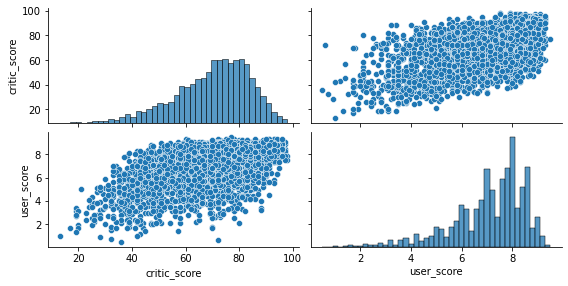

In [72]:
axes = sns.pairplot(games[['critic_score', 'user_score']].dropna(), height = 2, aspect=2)

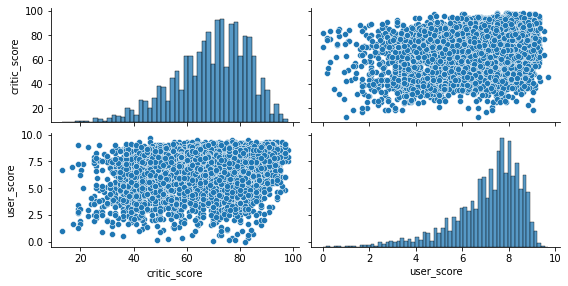

In [73]:
axes = sns.pairplot(games_final[['critic_score', 'user_score']], height = 2, aspect=2)

Compared to the initial `games` dataframe, we see some difference in the distributions of resulting constinuous variables, `critic_score` and `user_score`, in the final dataframe. Multiple models for their probabiltiy density estimation have been checked, both gaussian and tophat kde kernels with different scalar values of bandwidth; Scott's Rule and Silverman’s Rule for bandwidth estimation have been applied as well, with the gaussian kernel; still, this artifact persists. The final choice of the model ('tophat' with bandwidth=1) was guided mostly by a visual estimate and the search for the least change in the sample median values: the following heatmaps demonstrated the least change on the color scale.

<a id = "heatmaps" > <a/>

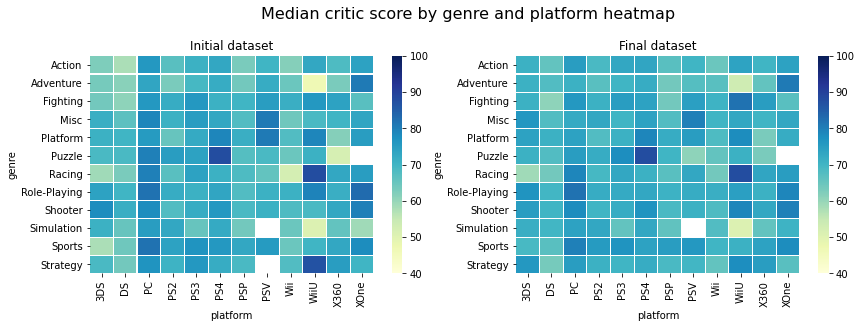

In [74]:
fig = plt.figure(figsize=(14,4))

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1]) 
ax1 = fig.add_subplot(gs[0, 0])


games_pivot = games.pivot_table(index = ['genre', 'platform'],
                                values = 'critic_score', aggfunc = 'median').reset_index()
# format x axis ticks if working with datetime type
# games_pivot['year_of_release'] = games_pivot['year_of_release'].dt.strftime('%Y')
games_pivot = games_pivot.pivot(index='genre', columns='platform', values='critic_score')
ax1 = sns.heatmap(games_pivot, cmap="YlGnBu", linewidths=.1, vmin=40, vmax=100)
ax1.set_title('Initial dataset')

ax2 = fig.add_subplot(gs[0, 1])


games_final_pivot = games_final.pivot_table(index = ['genre', 'platform'],
                                values = 'critic_score', aggfunc = 'median').reset_index()
# games_final_pivot['year_of_release'] = games_final_pivot['year_of_release'].dt.strftime('%Y')

games_final_pivot = games_final_pivot.pivot(index='genre', columns='platform', values='critic_score')
ax2 = sns.heatmap(games_final_pivot, cmap="YlGnBu", linewidths=.1, vmin=40, vmax=100)
ax2.set_title('Final dataset')

plt.suptitle(f"Median critic score by genre and platform heatmap", fontsize = 16, y = 1.05)


plt.show()

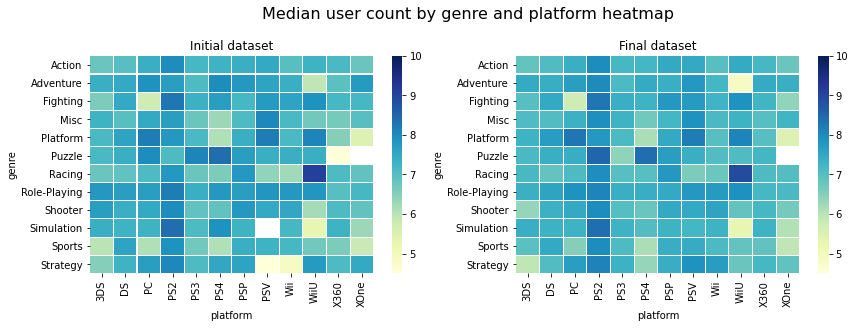

In [75]:
fig = plt.figure(figsize=(14,4))

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1]) 
ax1 = fig.add_subplot(gs[0, 0])


games_pivot = games.pivot_table(index = ['genre', 'platform'],
                                values = 'user_score', aggfunc = 'median').reset_index()
games_pivot = games_pivot.pivot(index='genre', columns='platform', values='user_score')
ax1 = sns.heatmap(games_pivot, cmap="YlGnBu", linewidths=.1, vmin=4.5, vmax=10)
ax1.set_title('Initial dataset')

ax2 = fig.add_subplot(gs[0, 1])


games_final_pivot = games_final.pivot_table(index = ['genre', 'platform'],
                                values = 'user_score', aggfunc = 'median').reset_index()
# formatng if working with datetime type
#games_final_pivot['year_of_release'] = games_final_pivot['year_of_release'].dt.strftime('%Y')

games_final_pivot = games_final_pivot.pivot(index='genre', columns='platform', values='user_score')
ax2 = sns.heatmap(games_final_pivot, cmap="YlGnBu", linewidths=.1, vmin=4.5, vmax=10)
ax2.set_title('Final dataset')

plt.suptitle(f"Median user count by genre and platform heatmap", fontsize = 16, y = 1.05)


plt.show()

[Back to Content](#content)

#### Conclusion on the missing values <a id = "miss_concl"> <a/>

Unfortunately, the research above is based on unrealistic dataset, thus, it seems to be a better solution just to drop the subset with missing values when the analysis involves the `critic_score`, `user_score`, and `ratings` variables. Nevertheless, we can and will use the final dataset when only sales variables are involved and make the necessary adjustments when necessary (e.g. in [the case](#eda_regional_sales_rating) of investigating the dependency of regional `_sales` on the `rating`).

[Back to Content](#content)

### Conclusions and further steps

To sum up the data preprocessing step:
1. We have fixed the column names and converted the relevant columns to more appropriate types.
2. We have explored the data for potential errors and artifacts other than missing values, such as [duplicates](#dup), [outdated platforms](#platform_drop); in addition, we revealed the [three generations of video games platforms](#platform_gen)
3. We have developed and applied two methods to [fix the missing values](#missing) and chose the one which seemed the most appropriate. First, we applied [multi-category sub-grouping and corresponding sub-group median estimates](#col_sample_distr_by_cat) to restore missing values, but ended up with obviously [distorted distribution](#multi_cat_sub_group_dist). Then we developed another approach, [generated additional values](#sample_distr_restore_missing) from the sample distribution of corresponding variable without missing values, [category-wise as well](#restore_missing); still, we saw [some difference in the distributions of resulting constinuous variables](#compare_restored), `critic_score` and `user_score`, in the final dataframe compared to the initial `games` dataframe, which [urged us to explore multiple models for their probabiltiy density estimation](#kde_experiments): in addition to gaussian kde kernel with different scalar values of bandwidth, Scott's Rule and Silverman’s Rule for bandwidth estimation have been applied as well, with the gaussian kernel, as well as tophat kde kernel with different scalar values of bandwidth; the final choice of the model ('tophat' with bandwidth=1) was [guided mostly by a visual estimate](#heatmaps) and the search for the least change in the sample median values. Unfortunately, due to the deviations from the initial sample distributions the results of this part are unacceptable; thus, in what follows, we will have to drop the missing values, when any of the `critic_score`, `user_score`, and `ratings` variables is icnluded in the analysis.

Further steps:
1. Analysing total sales and platform evolution patterns.
3. If possible, reveal the most prominent platforms and analyse their sales.
4. Analysing user behaviour accross regions (analysing sales by different categories).

[Back to Content](#content)

## 3. Exploratory data analysis <a id = "eda"> <a/>

Let's start with exploring how many games we are left for each year:

In [76]:
games_by_years = games_final.pivot_table(index = ['year_of_release'], values = 'name', aggfunc = ['count']).reset_index()
games_by_years.columns = ['year', 'release_count']
games_by_years['year'] = games_by_years['year'].dt.strftime('%Y')
games_by_years.sort_values(by='year').head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
release_count,89,200,299,289,327,528,865,1183,1425,1426,1255,1136,652,544,581,606,502


Enough data for every period. Let's check how the total sales varied for every platform.

[Back to Content](#content)

### Analyzing `total_sales` <a id = 'eda_total_sales'> <a/>

In [77]:
sales_by_platform = games_final.pivot_table(index = ['platform'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
sales_by_platform.columns = ['platform', 'total_sales', 'total_titles']
sales_by_platform.sort_values(by='total_sales', ascending = False, inplace = True)
sales_by_platform

,platform,total_sales,total_titles
3,PS2,1233.56,2127
10,X360,961.24,1232
4,PS3,931.33,1305
8,Wii,891.18,1286
1,DS,802.76,2120
5,PS4,314.14,392
6,PSP,289.53,1193
0,3DS,257.81,512
2,PC,205.72,917
11,XOne,159.32,247


In [78]:
top5_list = sales_by_platform['platform'].to_list()[:5]
top5 = ", ".join(top5_list)
print(f'The TOP5 platforms with the greatest total sales are {top5}.')

The TOP5 platforms with the greatest total sales are PS2, X360, PS3, Wii, DS.


Note: [we have already seen this list earlier](#platform_gen), while preparing the data. Let's check out the distributions of the sales for these "all times" TOP5 platforms based on the yearly releases.

In [79]:
top5_platform_sales = games_final.query('platform in @top5_list').pivot_table(index =
                                            ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
top5_platform_sales.columns = ['platform', 'year', 'total_sales', 'release_count']

Let's define a function to plot total sales by release years across the platforms.

In [80]:
def sales_releases_viz(df, for_title_str):

    #set figure size
    sns.set(rc={"figure.figsize":(18, 8)})

    #create the scastterplot
    sns.scatterplot(y = 'total_sales', x = 'year', size = 'release_count',
                    hue = 'platform', alpha = 0.7, data = df, sizes=(50, 600),
                    palette="viridis", linewidth=2)
    sns.lineplot(y = 'total_sales', x = 'year', hue = 'platform', data = df, palette="viridis")

    # Add titles (main and on axis)
    plt.xlabel("Year")
    plt.ylabel("Total sales in USD mln")
    plt.title(f"Total sales and number of released games across {for_title_str} platforms", y = 1.05, fontsize = 16)

    # Locate the legend inside of the plot
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10, labelspacing=1.5)

    # Annotate bubbles with bubble size
    for line in range(0,df.shape[0]):
        plt.text(df.year.iloc[line],
                df.total_sales.iloc[line],
                str(int(df.release_count.iloc[line])),
                horizontalalignment='right', verticalalignment = 'top',
                size='medium', color='black', fontsize = 11)
    plt.show()

<a id = 'top5'> <a/>

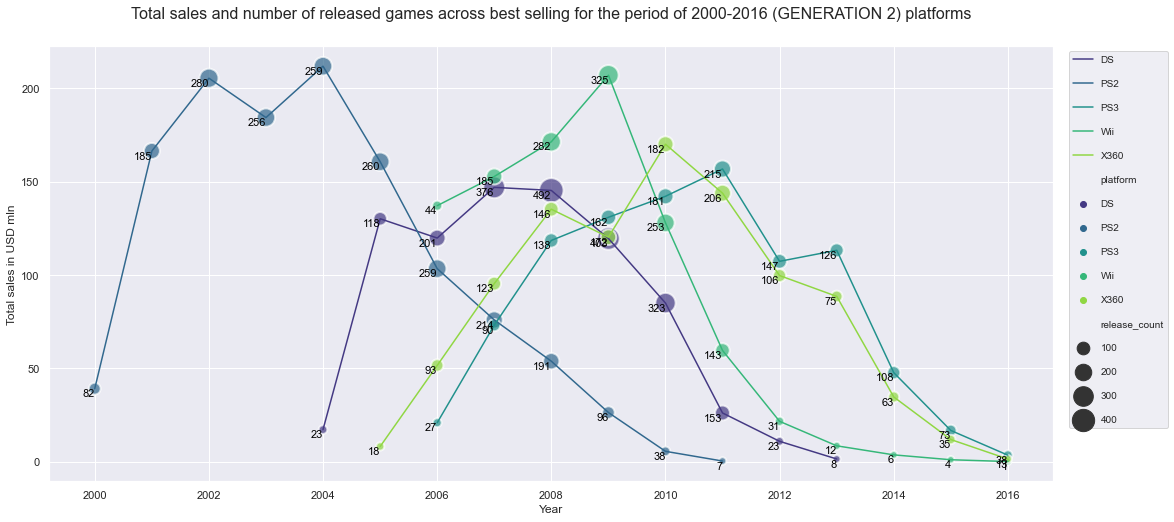

In [81]:
sales_releases_viz(top5_platform_sales, "best selling for the period of 2000-2016 (GENERATION 2)")

It looks like, for the period 2000 to 2016, it took 4 to 5 years for a platform to appear and build up the sales,  and 5 to 7 years to fade. From here we can conclude, that to build a prognosis for 2017 we should focus on the data for [GENERATION 3 of the platforms](#platform_gen), namely `PS4`, `3DS`, `XOne`, `WiiU`, and `PSV`.

Thus, only the data on GENERATION 3 platforms is relevant for our task; we will focus on these 5 platforms and will perform the same steps as for GENERATION 2 to take a look on the sales data.

In [82]:
# define the relevant platforms as a list
gen3_list = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

In [83]:
# filter the data
gen3_games = games_final.query('platform in @gen3_list')

In [84]:
# calculate aggregated measures
gen3_platform_sales = games_final.query('platform in @gen3_list').pivot_table(index =
                                            ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
gen3_platform_sales.columns = ['platform', 'year', 'total_sales', 'release_count']

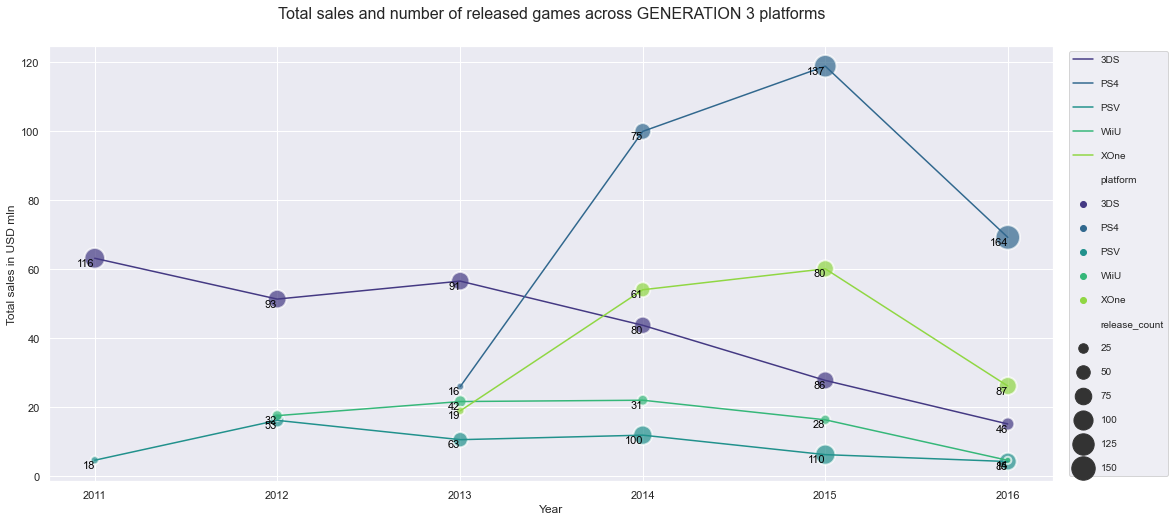

In [85]:
# visualise
sales_releases_viz(gen3_platform_sales, "GENERATION 3")

Looks like the third generation did not perform so well. Let's add the `PC`'s to the analysis: it can be the case that the technologal trends lead to their leadership. <a id = 'gen3_leaders'> <a/>

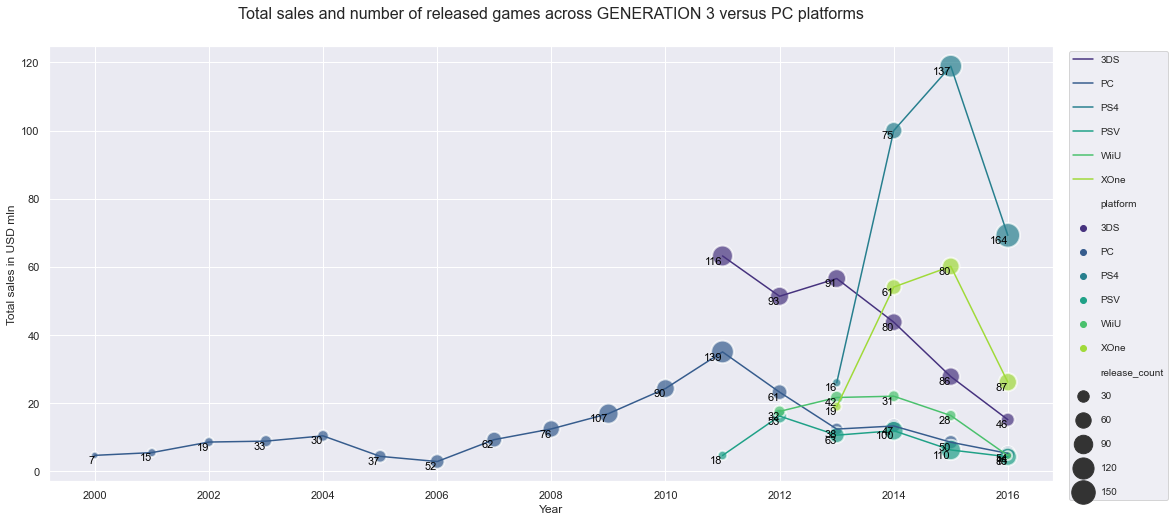

In [86]:
gen3_list = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV', 'PC']
gen3_games = games_final.query('platform in @gen3_list')
gen3_platform_sales = games_final.query('platform in @gen3_list').pivot_table(index =
                                            ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
gen3_platform_sales.columns = ['platform', 'year', 'total_sales', 'release_count']
sales_releases_viz(gen3_platform_sales, "GENERATION 3 versus PC")

No, our assumption was wrong, `PC`'s had been also experiencing decay (N.B. Looks like the raise of the smartphones is the reason for this).

We can conclude that there was a negative trend for `3DS`, `WiiU`, `PSV`, and `PC`, while `PS4` and `XOne` experienced a strange plunge. To be on the safe side, we will attribute this steep decline to incomplete data; therefore we are left with two platforms, `PS4` and `XOne`, both leading the sales and potentially profitable. Let's filter out the games for these platforms and apply our `col_sample_boxplots_by_cat()` function and build a box plot for the global sales of all games, broken down by platforms, genres and ratings.

[Back to Content](#content)

#### Analyzing `total_sales` for leading GENERATION 3 platforms <a id = 'eda_total_sales_lead_gen3'> <a/>

In [87]:
lead_list = ['PS4', 'XOne']
lead_games = games_final.query('platform in @lead_list')
len(lead_games)

639

N.B. We will [remember](#miss_concl) not to use this dataset for analysing dependencies on `critic_score`, `user_score`, and `rating`, for which we will have to apply the initial dataset with the missing values dropped out:

In [88]:
lead_games_short = games.dropna().query('platform in @lead_list')
len(lead_games_short)

398

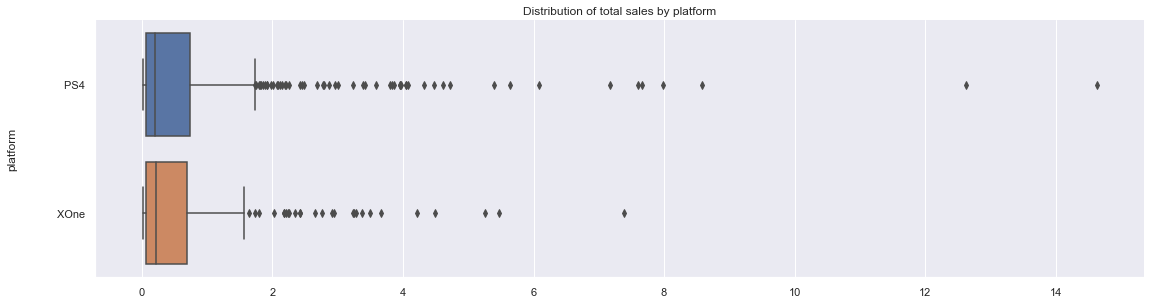

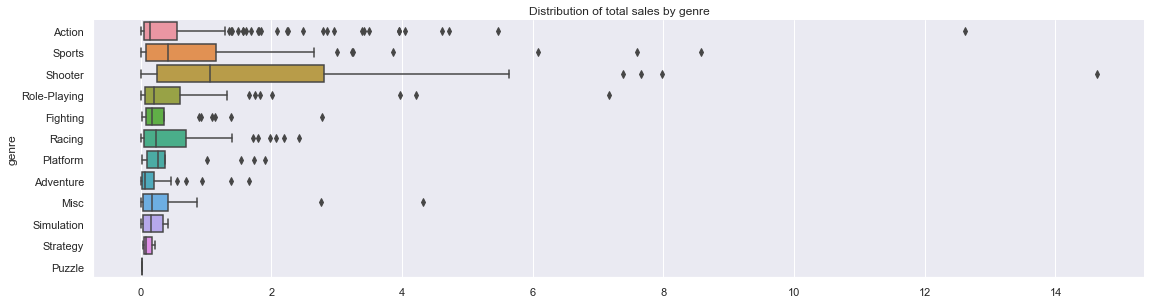

In [89]:
# categorical variables for exploration
plot_list = ['platform', 'genre']
# boxplots for `critic_score`
col_sample_boxplots_by_cat(lead_games,'total_sales', plot_list)

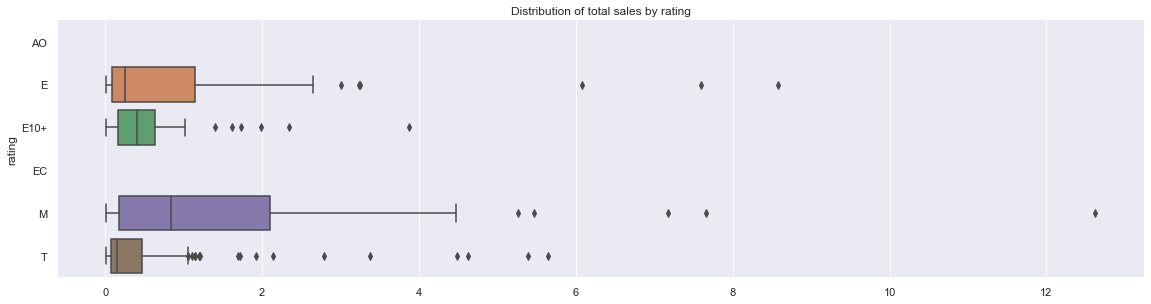

In [90]:
# We use the shorter version to explore the `rating` variable
col_sample_boxplots_by_cat(lead_games_short, 'total_sales', ['rating'])

For the two leading GENERAION 3 platforms, the distributions of sales behave differently between different categories of genres and ratings. For platforms, the overall differences in the sales seem to be insignificant, besides a bit higher amount of outliers for `PS4`. Let's calculate some statistics as well:

In [91]:
lead_games.pivot_table(index = ['platform'], values = 'total_sales',
                       aggfunc = ['count', 'min', 'mean', 'median', 'max', 'sum'])

,count,min,mean,median,max,sum
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,,
PS4,392,0.01,0.801378,0.20,14.63,314.14
XOne,247,0.01,0.645020,0.22,7.39,159.32


Both distributions are highly right skewed: precise values of mean and median estimates illustrate the high degree of skewness of the total sales distributions, but since they are similar we can choose one of them for further analysis. Let's focus on `PS4`, since it has more games released in total, and see how user and professional reviews affect sales.

The distributions by ratings differ as well, with the most of the sales falling into the mature category.

As opposed to the platforms, the sales distributions for the two leading GENERATION 3 platforms look completely different for different genres, with substabtially (and shockingly) higher sales volumes for shooters, followed by action and sports:

In [92]:
lead_games.pivot_table(index = 'genre', values = ['name', 'total_sales'],
            aggfunc = {'name': 'count', 'total_sales': 'sum'}).sort_values(by = 'name', ascending = False).T

genre,Action,Sports,Shooter,Role-Playing,Adventure,Misc,Racing,Fighting,Platform,Simulation,Strategy,Puzzle
name,229.00,84.00,79.00,65.00,42.00,39.00,39.00,25.0,17.00,10.00,9.00,1.00
total_sales,133.41,82.35,148.89,39.54,9.02,15.62,21.93,11.1,8.62,1.92,1.04,0.02


Finally, let's check what the leading platforms share was in total sales in 2015: <a id = 'PS4_XOne_share_2015'> <a/>

In [93]:
# pivot to calculate sales by platforms for 2015
sales_by_platform_year = games_final.query('year_of_release == "2015-01-01"').pivot_table(
                                            index = ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum']).reset_index()
sales_by_platform_year.columns = ['platform', 'year', 'total_sales_share']

# assign platforms besides `PS4` and `XOne` to others
sales_by_platform_year['platform'] = sales_by_platform_year['platform'].where(
                                     sales_by_platform_year['platform'].isin(['PS4', 'XOne']), 'Other')
# calculate shares
sales_by_platform_year.groupby('platform').sum() / sales_by_platform_year['total_sales_share'].sum()

,total_sales_share
platform,
Other,0.33189
PS4,0.44369
XOne,0.22442


`PS4` and `XOne` platfroms were responsible for two thirds of total sales for the Ice store in 2015.

[Back to Content](#content)

#### Investigating the `PS4` platform sales <a id = 'ps4_sales'> <a/>

While remembering that we have the missing values to account for, we will explore correlations based on the raw subset of the data:

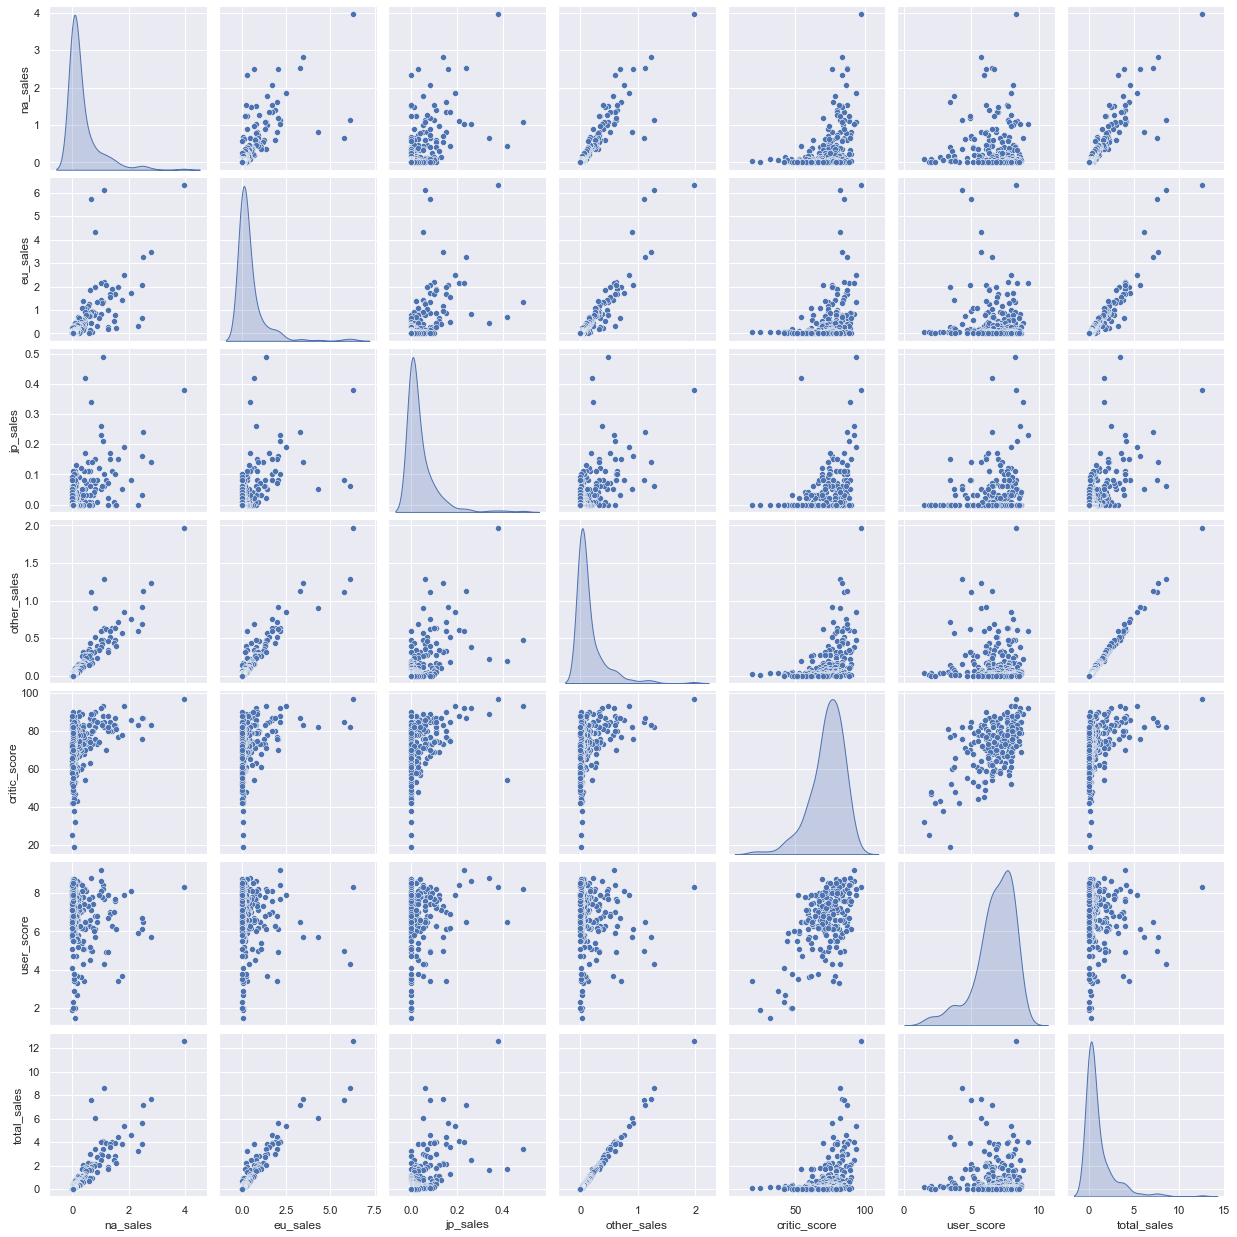

In [94]:
# plot a scatter matrix fpr `PS4` games
ps4_games = lead_games_short[lead_games_short['platform']=='PS4']
axes = sns.pairplot(ps4_games, diag_kind = 'kde')

In [95]:
# calculate the correlation matrix
corr = ps4_games.corr()
corr

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.712361,0.528266,0.914296,0.411197,-0.019951,0.892574
eu_sales,0.712361,1.000000,0.518152,0.934677,0.344032,-0.048178,0.951346
jp_sales,0.528266,0.518152,1.000000,0.565064,0.321016,0.176156,0.590673
other_sales,0.914296,0.934677,0.565064,1.000000,0.406075,-0.034432,0.997777
critic_score,0.411197,0.344032,0.321016,0.406075,1.000000,0.572802,0.403573
user_score,-0.019951,-0.048178,0.176156,-0.034432,0.572802,1.000000,-0.030888
total_sales,0.892574,0.951346,0.590673,0.997777,0.403573,-0.030888,1.000000


`total_sales` has a moderate correlation (0.41) with `critic_score` and seemingly no correlation with `user_score`. As to its dependence on regional sales, it is fully correlated with the sales in North America, Europe and other sales and moderately correlated with the sales in Japan. Interestingly, in Japan, the sales have weak positive correlation with `user_score`.

Nevertheless, the lack of correlation between the sales and the user ratings feels unnatural, let's make additional check on the scatter matrix, this time for specific genres (we will choose the three leading genres): <a id = 'strange_corr'> <a/>

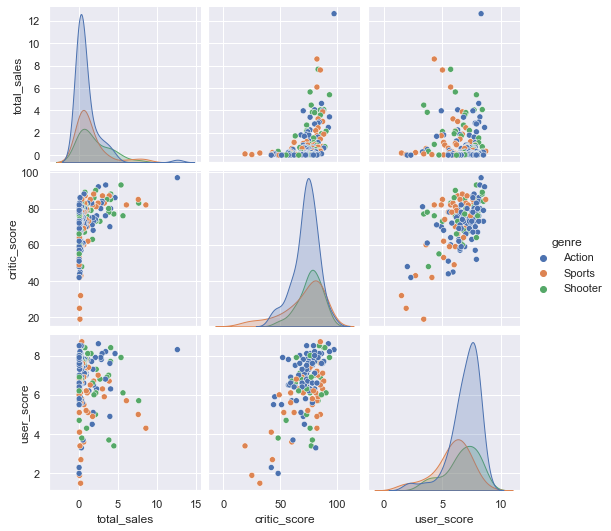

In [96]:
# plot a scatter matrix for three leading genres for `PS4` platform
ps4_lead_genre_list = ["Shooter", "Action", "Sports"]
ps4_games_lead_genre = ps4_games[['total_sales', 'critic_score', 'user_score', 'genre']].query('genre in @ps4_lead_genre_list')
axes = sns.pairplot(ps4_games_lead_genre, hue = 'genre', diag_kind = 'kde')

In [97]:
for genre in ps4_lead_genre_list:
    corr = ps4_games_lead_genre[ps4_games_lead_genre['genre']==genre].corr()
    print(genre, "\n", corr, "\n")

Shooter 
               total_sales  critic_score  user_score
total_sales      1.000000      0.482971   -0.164362
critic_score     0.482971      1.000000    0.408145
user_score      -0.164362      0.408145    1.000000 

Action 
               total_sales  critic_score  user_score
total_sales      1.000000      0.471829    0.153569
critic_score     0.471829      1.000000    0.561926
user_score       0.153569      0.561926    1.000000 

Sports 
               total_sales  critic_score  user_score
total_sales      1.000000      0.443255   -0.033383
critic_score     0.443255      1.000000    0.740700
user_score      -0.033383      0.740700    1.000000 



Interestingly, shooters have a negative correlations with user ratings, while action games have positive correlation with user ratings (!); sport games' sales are neutral with regard to the `user_score` variable, but have the highest correlation with critic ratings, while the `user_score` itself, as opposed to the shooters and action games, has relatively high correlation with the `critic_score`.

Let's check the total sales of the same games for `PC4` on other platforms:

In [98]:
# build a list of the relevant game titles based on the full subset for `PS4`
ps4_titles = lead_games[lead_games['platform']=='PS4']['name'].to_list()

In [99]:
# filter out the same titles across platforms
ps4_games_compare = games_final.query('name in @ps4_titles')

In [100]:
# check in how many platform those games do appear
ps4_games_compare['platform'].unique()

array(['PS3', 'X360', 'PS4', 'XOne', 'PC', 'WiiU', '3DS', 'PSV', 'PS2',
       'Wii', 'DS', 'PSP'], dtype=object)

There are to many platforms to compare, let's introduce grouping for the platforms (we will substitute the names in the `platform` column, while preserving the names for platforms which had more than USD 10 mln in sales in 2015 and the rest of the platforms will receive the name `other`) sum up the the total sales for the remained platforms and for the group `others`.

In [101]:
ps4_games_sales = ps4_games_compare.query('name in @ps4_titles').pivot_table(index =
                                            ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
ps4_games_sales.columns = ['platform', 'year', 'total_sales', 'release_count']

# filter the platforms which made more than USD 10 mln in selling the same games as `PS4` in 2015
top_pl = ps4_games_sales[(ps4_games_sales['total_sales']>10) & (ps4_games_sales['year']=='2015-01-01')]['platform'].unique()

# assign other platforms to the `Other` group
ps4_games_compare['platform'] = ps4_games_compare['platform'].where(ps4_games_compare['platform'].isin(top_pl), 'Other')

# recalculating the stats
ps4_games_sales = ps4_games_compare.query('name in @ps4_titles').pivot_table(index =
                                            ['platform', 'year_of_release'], values = 'total_sales',
                                            aggfunc = ['sum', 'count']).reset_index()
ps4_games_sales.columns = ['platform', 'year', 'total_sales', 'release_count']

Now we can compare the sales of the games for `PS4` on other platforms:

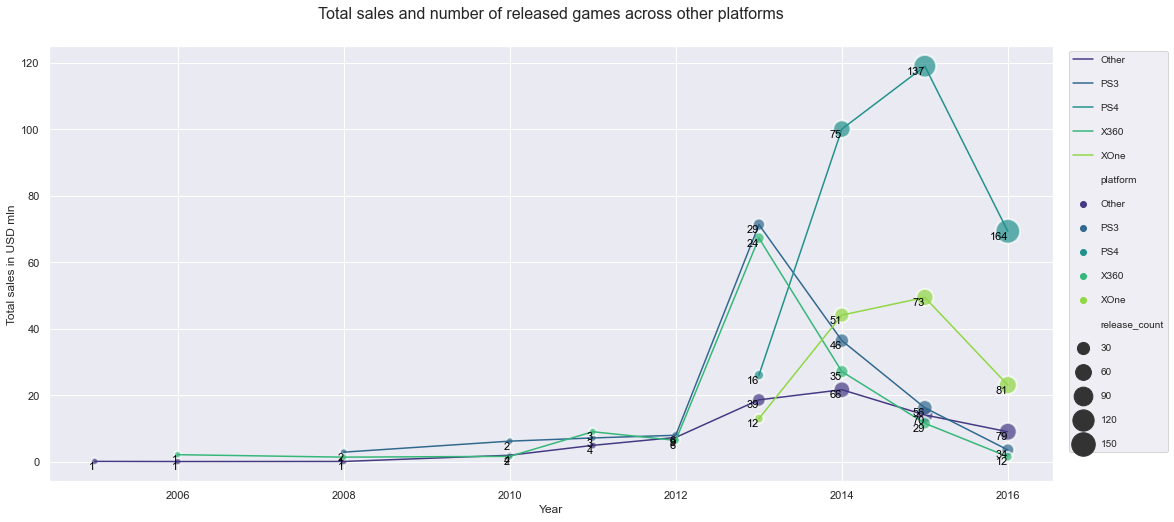

In [102]:
# apply the sales viz function
sales_releases_viz(ps4_games_sales, "other")

73 out of 80 games released for `XOne` are those released for `PS4` and they brought in appr. 80% of the sales for `XOne` in 2015. Other platfroms have some of the `PS4` games on the list as well.

[Back to Content](#content)

### Analyzing sales by platforms and regions  <a id = 'eda_regional_sales_platforms'> <a/>

In a similar way we analyzed top 5 selling platforms for `total_sales`, let's investigate sales by regions and platforms. We will look at the sales starting from 2013, to analyse the GENERATION 3 platforms. We can use the full dataset in this case.

In [103]:
reg_sales_by_platform = games_final.query('year_of_release > "2012-01-01"').pivot_table(index = ['platform'],
                                                values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                                aggfunc = ['sum']).reset_index()
col_names = ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
reg_sales_by_platform.columns = col_names
reg_sales_by_platform

,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,30.96,67.81,38.20,6.28
1,DS,0.85,0.00,0.57,0.12
2,PC,25.36,0.00,11.11,2.96
3,PS3,67.81,23.35,63.50,26.77
4,PS4,141.09,15.96,108.74,48.35
5,PSP,0.17,3.29,0.00,0.04
6,PSV,6.10,18.59,5.04,3.26
7,Wii,5.93,0.05,6.56,1.12
8,WiiU,19.85,10.88,29.21,4.69
9,X360,42.52,0.51,81.66,12.11


In [104]:
reg_sales_by_platform.sum()[1:].sort_values(ascending = False)

jp_sales       437.71
na_sales       392.23
eu_sales       140.78
other_sales    119.97
dtype: object

Speaking of regions, we can see that Japan is the leader leader in video games consumption (now it is clear why the data on japan were singled out) for the Ice online store, while sales in Europe and the rest of the regions, besides, North America and Japan, are almost equal.

In [105]:
# dictionary to store "region: [top 5 platforms list]" output
reg_top5_platforms = {}
# dictionary to_store "region: top 5 platforms + Others sales dataframe" output
reg_top_sales = {}


for col in col_names[1:]:
    reg_sales_by_platform.sort_values(by=col, ascending = False, inplace = True)
    reg_top5_platforms[col] = reg_sales_by_platform['platform'].to_list()[:5]
    
    reg_top5_pl = reg_top5_platforms[col]
    
    top5 = ", ".join(reg_top5_pl)
    print(f"The TOP5 platforms with the greatest `{col}` are {top5}.")
    
    t5_reg_sales = reg_sales_by_platform.query('platform in @reg_top5_pl')
    t5_reg_sales = t5_reg_sales[['platform', col]].set_index('platform', drop = True)
    
    top5_sales_share = int(t5_reg_sales[col].sum()*100/reg_sales_by_platform[col].sum())
    t5_reg_sales.loc['Others'] = reg_sales_by_platform[col].sum() - t5_reg_sales[col].sum()
    reg_top_sales[col] = t5_reg_sales
  
    print(f"The TOP5 platform share in total `{col}` were {top5_sales_share}%.")
    


The TOP5 platforms with the greatest `na_sales` are PS4, PS3, XOne, X360, 3DS.
The TOP5 platform share in total `na_sales` were 85%.
The TOP5 platforms with the greatest `eu_sales` are 3DS, PS3, PSV, PS4, WiiU.
The TOP5 platform share in total `eu_sales` were 97%.
The TOP5 platforms with the greatest `jp_sales` are PS4, XOne, X360, PS3, 3DS.
The TOP5 platform share in total `jp_sales` were 88%.
The TOP5 platforms with the greatest `other_sales` are PS4, PS3, XOne, X360, 3DS.
The TOP5 platform share in total `other_sales` were 89%.


For all the regions the leading platform, in terms of sales, was `PS4`, except for Europe, where `3DS` became more popular. The TOP5 platform share in total sales for a region was 85% to 97%.

Now let's take the top  five platforms for each region and illustrate their market shares. Since the sales volumes differ a lot from region to region, we will visualize percentages separately for each region to make the graphs more readable.

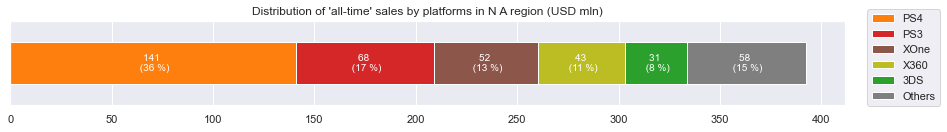

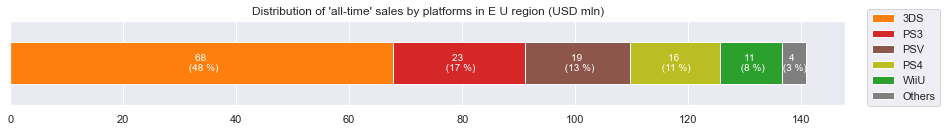

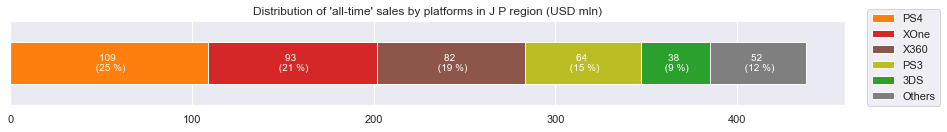

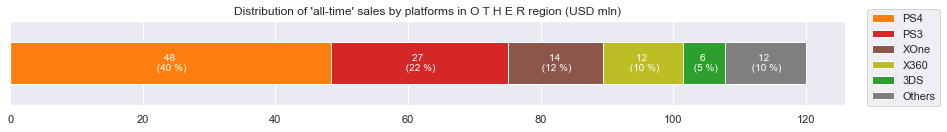

In [106]:
for col in reg_top_sales:
    
    t5_reg_sales = reg_top_sales[col]
    
    cmap = plt.get_cmap("tab10")
    colors1 = cmap([1, 3, 5, 8, 2, 7])
    
    ax = t5_reg_sales.transpose().plot.barh(align='center', stacked=True, figsize=(12, 2), color=colors1)
    ax.set_title("Distribution of 'all-time' sales by platforms in {} region (USD mln)".format(' '.join(str(col).split("_")[0].upper())))
    plt.yticks([])
    plt.tight_layout()
                
    for p in ax.patches:
        
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} \n ({:.0f} %)'.format(width, width*100/reg_sales_by_platform[col].sum()), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=10)
    

    ax.legend(t5_reg_sales.index, bbox_to_anchor=(1.12, 1.2))
    plt.show()

### Analyzing sales by genres  and regions <a id = 'eda_regional_sales_genres'> <a/>

We [have already seen](#eda_total_sales_lead_gen3) that for `PS4` and `XOne` paltforms shooters, sports, and racing are the most selling genres. Let's investigate whether there are regional differences in sales by genres for all platforms in general. Here as well, we can use the full subset; we will analyze the sales starting from 2013 to cover the mmost relevant platforms.

In [107]:
reg_sales_by_genre = games_final.query('year_of_release > "2012-01-01"').pivot_table(index = ['genre'],
                                                values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                                aggfunc = ['sum']).reset_index()
col_names = ['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
reg_sales_by_genre.columns = col_names
reg_sales_by_genre

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,118.13,40.49,126.05,37.20
1,Adventure,8.25,5.82,7.14,2.43
2,Fighting,8.55,7.65,15.55,3.56
3,Misc,20.04,9.20,27.49,6.09
4,Platform,15.58,4.79,18.14,4.12
5,Puzzle,1.00,1.18,0.83,0.16
6,Racing,20.19,2.30,12.96,4.44
7,Role-Playing,36.97,51.04,46.40,11.48
8,Shooter,87.86,6.61,109.74,28.77
9,Simulation,10.92,4.52,4.86,1.46


In [108]:
reg_top5_genres = {}
reg_top_sales_genres = {}

for col in col_names[1:]:
    reg_sales_by_genre.sort_values(by=col, ascending = False, inplace = True)
    reg_top5_genres[col] = reg_sales_by_genre['genre'].to_list()[:5]
    
    reg_top5_gn = reg_top5_genres[col]
    
    top5 = ", ".join(reg_top5_gn)
        
    t5_reg_sales = reg_sales_by_genre.query('genre in @reg_top5_gn')
    t5_reg_sales = t5_reg_sales[['genre', col]].set_index('genre', drop = True)
    
    top5_sales_share = int(t5_reg_sales[col].sum()*100/reg_sales_by_genre[col].sum())
    t5_reg_sales.loc['Others'] = reg_sales_by_genre[col].sum() - t5_reg_sales[col].sum()
    reg_top_sales_genres[col] = t5_reg_sales
    
    print(f"The TOP5 genres by `{col}`: {top5} with {top5_sales_share}% of all regional sales.")
    

The TOP5 genres by `na_sales`: Action, Shooter, Sports, Role-Playing, Racing with 82% of all regional sales.
The TOP5 genres by `eu_sales`: Role-Playing, Action, Misc, Fighting, Shooter with 81% of all regional sales.
The TOP5 genres by `jp_sales`: Action, Shooter, Sports, Role-Playing, Misc with 85% of all regional sales.
The TOP5 genres by `other_sales`: Action, Shooter, Sports, Role-Playing, Misc with 85% of all regional sales.


For all the regions the lists of leading genres, in terms of sales, were similar (action, sports, shooter, misc, and racing/role-playing), except for Europe again, where the list was completely different: action games appeared at the second place, while role-playing became the leading genre; sports moved to the 4th place, and platform games entered the TOP5 list. The TOP5 genres share in total sales for a region was between 81% and 85%.

Now let's take the top five genres for each region and illustrate their market shares. Again, we will prefer to visualize the data separately for each region to make the graphs readable.

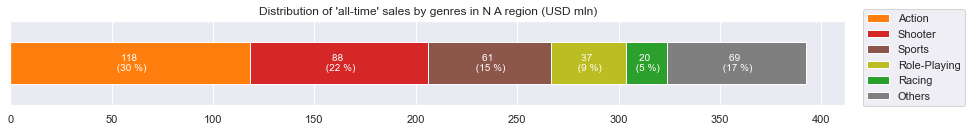

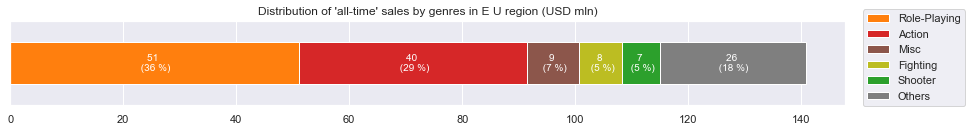

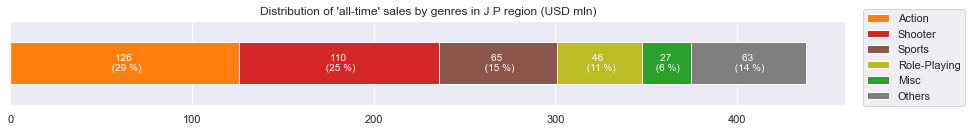

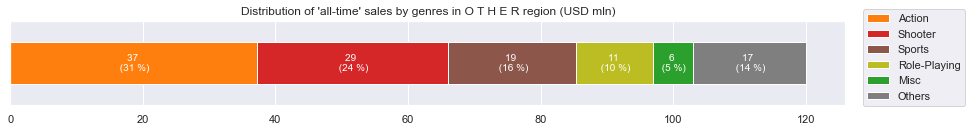

In [109]:
for col in reg_top_sales_genres:
    
    t5_reg_sales = reg_top_sales_genres[col]
    
    cmap = plt.get_cmap("tab10")
    colors1 = cmap([1, 3, 5, 8, 2, 7])
    
    ax = t5_reg_sales.transpose().plot.barh(align='center', stacked=True, figsize=(12, 2), color=colors1)
    ax.set_title("Distribution of 'all-time' sales by genres in {} region (USD mln)".format(' '.join(str(col).split("_")[0].upper())))
    plt.yticks([])
    plt.tight_layout()
                
    for p in ax.patches:
        
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} \n ({:.0f} %)'.format(width, width*100/reg_sales_by_genre[col].sum()), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=10)
    

    ax.legend(t5_reg_sales.index, bbox_to_anchor=(1.15, 1.2))
    plt.show()

### Analyzing sales by rating  and regions <a id = 'eda_regional_sales_rating'> <a/>

Let's investigate whether regional sales depend on rating. In accordance with the conclusion [above](#miss_concl), we will use the initial subset of the data with missing values dropped. We will look at the sales starting from 2013 as well.

In [110]:
reg_sales_by_rating = games.query('year_of_release > "2012-01-01"').pivot_table(index = ['rating'],
                                                values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                                aggfunc = ['sum']).reset_index()
col_names = ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
reg_sales_by_rating.columns = col_names
reg_sales_by_rating

,rating,na_sales,eu_sales,jp_sales,other_sales
0,AO,0.00,0.00,0.00,0.00
1,E,83.36,15.14,79.05,22.61
2,E10+,42.69,5.89,54.24,12.57
3,EC,0.00,0.00,0.00,0.00
4,M,145.32,14.11,165.21,47.04
5,T,41.95,20.59,49.79,14.29


In [111]:
reg_top5_ratings = {}
reg_top_sales_ratings = {}

for col in col_names[1:]:
    reg_sales_by_rating.sort_values(by=col, ascending = False, inplace = True)
    reg_top5_ratings[col] = reg_sales_by_rating['rating'].to_list()[:]
    
    reg_top5_rt = reg_top5_ratings[col]
    
    top5_rt = ", ".join(reg_top5_rt)
        
    t5_rt_reg_sales = reg_sales_by_rating.query('rating in @reg_top5_rt')
    t5_reg_sales = t5_rt_reg_sales[['rating', col]].set_index('rating', drop = True)
    reg_top_sales_ratings[col] = t5_reg_sales # five ratings all-in-all, no 'Others'

        
    top5_rt_sales_share = int(t5_rt_reg_sales[col].sum()*100/reg_sales_by_rating[col].sum())
    
    
    print(f"The TOP5 ratings by `{col}` were {top5_rt} with {top5_rt_sales_share}% of all regional sales.")

The TOP5 ratings by `na_sales` were M, E, E10+, T, AO, EC with 100% of all regional sales.
The TOP5 ratings by `eu_sales` were T, E, M, E10+, AO, EC with 100% of all regional sales.
The TOP5 ratings by `jp_sales` were M, E, E10+, T, AO, EC with 100% of all regional sales.
The TOP5 ratings by `other_sales` were M, E, T, E10+, AO, EC with 100% of all regional sales.


There 5 ratings all-in all, thus, top5 rating is not so informative; the lists of top2 selling ratings is the same for all the regions (M, E) as well; similarly to the `platform` and `genre` variables, there are some differences for Europe: `T` is on the first place and `M` is in the third place. The TOP3 ratings share in total sales for a region was between 88% and 95% as one can see from the graphs below.

Now let's take the all five ratings illustrate their market shares for each region. Again, due to different sales volumes by regions, we will prefer to visualize the data separately for each region to make the graphs readable.

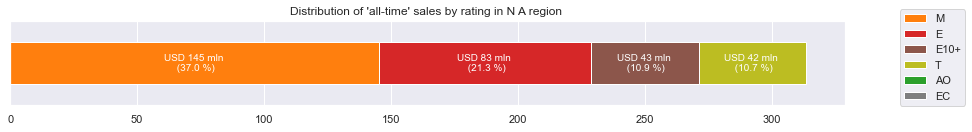

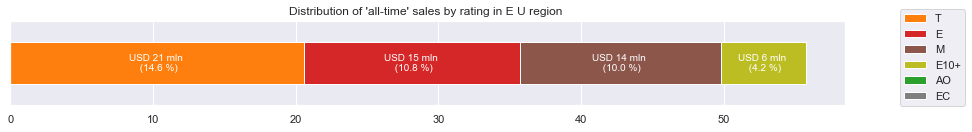

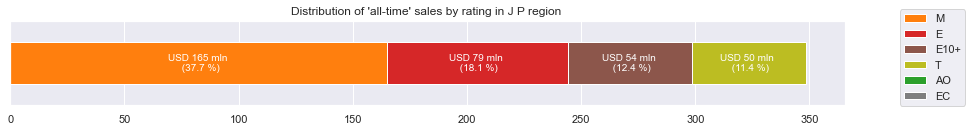

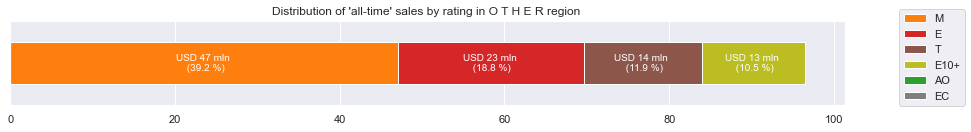

In [112]:
for col in reg_top_sales_ratings:
    
    t5_reg_sales = reg_top_sales_ratings[col]
    
    cmap = plt.get_cmap("tab10")
    colors1 = cmap([1, 3, 5, 8, 2, 7])
    
    ax = t5_reg_sales.transpose().plot.barh(align='center', stacked=True, figsize=(12, 2), color=colors1)
    ax.set_title("Distribution of 'all-time' sales by rating in {} region ".format(' '.join(str(col).split("_")[0].upper())))
    plt.yticks([])
    plt.tight_layout()
                
    for p in ax.patches[:-2]: # have to exclude the last two ones, since their values are near zero
        
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                'USD {:.0f} mln \n ({:.1f} %)'.format(width, width*100/reg_sales_by_genre[col].sum()), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=10)
    

    
    ax.legend(t5_reg_sales.index, bbox_to_anchor=(1.15, 1.2))
    plt.show()

[Back to Content](#content)

### Conclusions and further steps

In what follows, the findings are summirized for the exploratory analysis.


1. Video games platforms rise and fade in generations; it takes 4 to 5 years for a platfrom to grow and 5 to 7 years to fade.
2. In 2010th, 5 platfroms were launched and, as we have revealed, two of them, `PS4` and `XOne`, were growing faster than others; actually, in 2015, the total sales for `PS4` are double of those for `XOne` and together they brought in two thirds of the overall sales (USD 180 mln) for the Ice store.
3. The analysis across regions revealed that the lists of leading platforms and genres, in terms of sales, tend to remain identical, except for Europe.


At the next step, we should conduct statistical data analysis; we will test the hypotheses with regard to the user ratings for leading GENERATION 3 platforms and the two most popular genres.

[Back to Content](#content)

## SDA <a id='sda'> <a/>

In what follows we employ numerical methods of hypothesis testing to conduct statistical significance checks for selected sample means. To this end, we employ the two-sample t-test is used to determine if two population means are equal. The Python implementation of the t-test is [`scipy.stats.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function. Before applying it, we will check whether the two samples have equal variances: we will employ either [Bartlett’s test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm) or [the Levene test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm) for equal variances. The Bartlett test tests the null hypothesis that all input samples are from populations with equal variances for normal populations; the Python implementation of this test is [`scipy.stats.bartlett()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett) function. Levene’s test has better performance in cases with significant deviations from normality; The Python implementation of this test is [`scipy.stats.levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) function.

We will consider two null hypothesis for testing (with regard to [the two most prominent platforms](#eda_total_sales_lead_gen3) we have revealed to plan the marketing campaign of 2017):

1. Average user ratings of the `XOne` and `PS4` platforms are equal;
2. Average user ratings for the `Action` and `Sports` genres are equal.

We have already [seen](#eda_total_sales_lead_gen3), that `PS4` and `XOne` brought in two thirds of total sales (data for 2016 are insufficient) and the most popular genres were `Shooter`, `Action`, and `Sports`. Let's illustrate the distributions of the `user_scores` for the `lead_games` sample by these two categorical variables, `platform` and `genre`.

<a id = 'normality'> <a/>

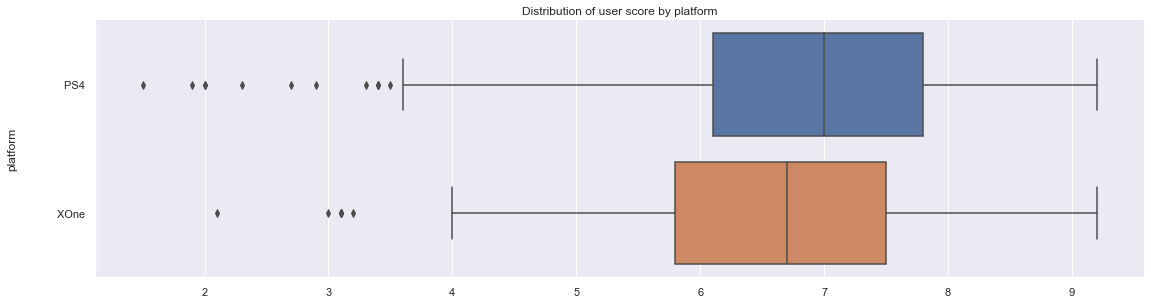

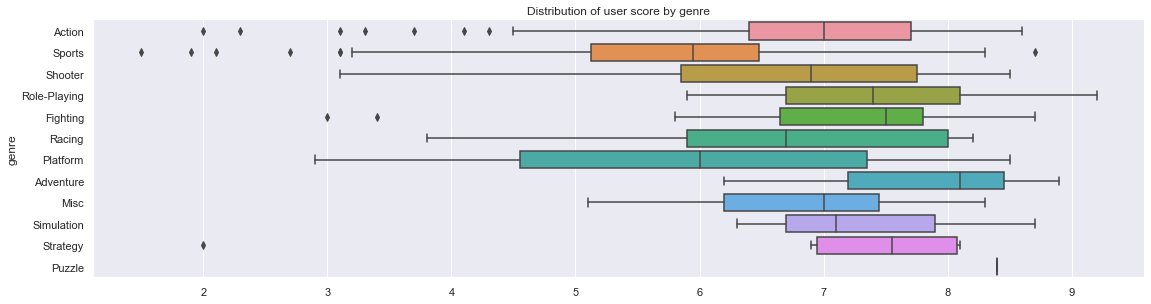

In [113]:
# categorical variables for exploration
plot_list = ['platform', 'genre']
# boxplots for `critic_score`
col_sample_boxplots_by_cat(lead_games_short,'user_score', plot_list)

 <a id = 'normality_rejected'> <a/>

From this boxplot diagram follow two observations relevant to the analysis:
1. The assumption of normal distibutions is unreasonable for the `user_ score` variable no matter what category is under consideratoin;
2. The alternative hypotheses for our tests will be that `PS4` has a greater mean user rating than `XOne`, while games of the `Action` genre have, on average, a greater user rating than the games of the `Sports` genre.

Let's proceed by running the Levene test.

### Testing the difference in average user ratings for `XOne` and `PS4` platforms <a id = 'test1'> <a/>

#### Levene test

1. Null-hypothesis: `PS4` and `XOne` samples have equal variance for `user_score` distribution;
2. p-value: 5%;
3. The alternative hypothsis is that `PS4` and `XOne` samples have different variance for `user_score` distribution. If the p-value is smaller than 5%, then we will have evidence against the null hypothesis of equal variance, so that we will have to define the `equal_var` attribute of the t-test as `False` and perform [Welch's variation of the t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test).

In [114]:
stat, p = stats.levene(lead_games_short[lead_games_short['platform']=='PS4']['user_score'],
                       lead_games_short[lead_games_short['platform']=='XOne']['user_score'])
p

0.6835874965585448

The p-value is well above 5%, so that a conclusion can be made that we cannot reject the hypothesis of the two samples under consideration having equal variances and regular t-test should be used to test for equal means.

#### t-test

1. Null hypothesis:  `PS4` and `XOne` samples have equal `user_score` means;
2. p-value: 5%;
3. We will use one-sided version of the test and employ the alternative hypothesis of `PS4` sample having a greater `user_score` mean than `XOne` sample; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [115]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [116]:
stat, p = stats.ttest_ind(lead_games_short[lead_games_short['platform']=='PS4']['user_score'],
                          lead_games_short[lead_games_short['platform']=='XOne']['user_score'],
                          equal_var=True, alternative='greater')
p

0.04432409367857837

The null-hypothesis is rejected; `PS4` sample have a greater `user_score` mean than `XOne` sample, i.e. on average, the user ratings for the games for the `PS4` platform are higher than those for the `XOne` platform.

[Back to Content](#content)

### Testing the difference in average user rating for `Action` and `Sports` games for `PS4` and `XOne` platforms <a id = 'test2'> <a/>

#### Levene test

In [117]:
stat, p = stats.levene(lead_games_short[lead_games_short['genre']=='Action']['user_score'],
                       lead_games_short[lead_games_short['genre']=='Sports']['user_score'])
p

0.30568547160915516

In this case as well, the p-value is well above 5%, so that a conclusion can be made that we cannot reject the hypothesis of the two samples under consideration having equal variances and regular t-test should be used to test for equal means.

#### t-test

1. Null hypothesis:  `Action` and `Sports` samples have equal `user_score` means;
2. p-value: 5%;
3. We will use the default two-sided version, i.e. the alternative hypothesis is that `Action` and `Sports` samples have different `user_score` means; if the p-value is smaller than 5%, we will have evidence against the null hypothesis of equal population means.

In [118]:
stat, p = stats.ttest_ind(lead_games_short[lead_games_short['genre']=='Action']['user_score'],
                          lead_games_short[lead_games_short['genre']=='Sports']['user_score'], equal_var=True)
p

4.398446908613923e-08

The null-hypothesis is rejected; two samples have different means, moreover on average, the user ratings for `Action` games for `Sports` games for `PS4` and `XOne` platforms are different.

[Back to Content](#content)

### Hypothesis testing summary

We have tested two hypotheses on user ratings, with regard to platforms and genres:

1. Average user ratings of the `XOne` and `PS4` platforms are equal;
2. Average user ratings for the `Action` and `Sports` genres are equal.

Before running the hypotheses testing, we made additional check of our basic assumtion of the normality of the `user_count` distributions (we rejected this one). For each hypothesis about the mean, we tested the hypothesis of the equality of the variances (this one could not be rejected). We chose one-sided alternative hypotheses, so that we could show that, on average, the games for `PS4` receive higher scores from users than games for `XOne`; the same is valied for `Action` - `Sports` games pair.




[Back to Content](#content)

## General conclusion <a id="conclusions"> <a/>

I stepped into a role of an analyst for the online store Ice, which sells video games all over the world. I was asked to identify patterns that determine whether a game succeeds or not and to spot potential big winners, with the aim to plan advertising campaign for 2017. I was provided with historical data on games for various platforms, their genres, user and expert ratings, ESRB ratings and sales across different regions, though sales data on 2016 seemed to be incomplete.

Initital [data overview](#explore) showed, that:
1. At our disposal is a dataset on about 16700 games.
2. The games' release years spanned over 37 years.
3. These are games in 13 genres for 31 platform.
4. For appr. 50% of the dataset the critic rating was lacking, and for appr. 40% the user and the ESRB score was lacking.
5. There were minor issues with column names (uppercase) and duplicates.

At the [data preprocessing step](#preprocessing), we:

1. Fixed the column names and converted the relevant columns to more appropriate types.
2. Explored the data for potential errors and artifacts other than missing values, such as [duplicates](#dup), [outdated platforms](#platform_drop); in addition, we revealed the [three generations of video games platforms](#platform_gen).
3. Added the `total_sales` variable, for the sake of further analysis.
3. Tried several methods to [fix the missing values](#missing) and chose the one which seemed the most appropriate. First, we applied [multi-category sub-grouping and corresponding sub-group median estimates](#col_sample_distr_by_cat) to restore missing values, but ended up with obviously [distorted distribution](#multi_cat_sub_group_dist). Then we developed another approach, [generated additional values](#sample_distr_restore_missing) from the sample distribution of corresponding variable without missing values, [category-wise as well](#restore_missing); still, we saw [some difference in the distributions of resulting constinuous variables](#compare_restored), `critic_score` and `user_score`, in the final dataframe compared to the initial `games` dataframe, which [urged us to explore multiple models for their probabiltiy density estimation](#kde_experiments): in addition to gaussian kde kernel with different scalar values of bandwidth, Scott's Rule and Silverman’s Rule for bandwidth estimation have been applied as well, with the gaussian kernel, as well as tophat kde kernel with different scalar values of bandwidth; the final choice of the model ('tophat' with bandwidth=1) was [guided mostly by a visual estimate](#heatmaps) and the search for the least change in the sample median values. __Unfortunately, the resulting distributions of the `critic_score`, `user_score`, and `rating` variables are unexceptable, so we could not employ the full dataset when any of these three variables is included in the analysis; nevertheless, we employ the resulting "final" dataset, when possible, to not exclude the relevant sales data.__



The [exploratory data analysis](#eda) showed, that:

1. Video games platforms come and go in generations; [it takes 4 to 5 years](#top5) for a platfrom to grow and 5 to 7 years to fade.
2. In 2010th, 5 platfroms were launched and, as we have revealed, two of them, [`PS4` and `XOne`, were growing faster than others](#gen3_leaders); actually, in 2015, the total sales for `PS4` are double of those for `XOne` and together they [brought in two thirds of the overall sales](#PS4_XOne_share_2015) (USD 180 mln) for the Ice store.
3. The [analysis across regions](#eda_regional_sales_genres) revealed that the lists of leading genres, in terms of sales, were similar (action, sports, shooter), except for Europe, where the list was completely different: role-playing became the leading genre, action games appeared at the second place and miscellaneous at the third; sports moved to the 4th place.

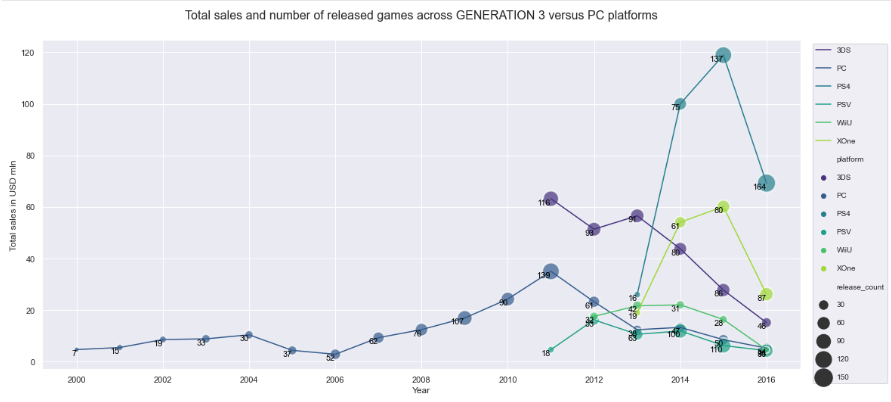

It is worth noting that the analysis of correlations between total sales and ratings for `PS4` demonstrated some degree of correlation between `critic_score` and `total_sales` and near-zero correlation between `user_scroe` and `total_sales`. When [run against different genres](#strange_corr), the correlation matrix for action games revealed some positive correlation between `user_score` and `total_sales`, while the correlation matrix for sports games showed high correlation between the ratings themselves, but near_zero correlation between the `total_sales` and `user_rating`. N.B. shooters demonstrated even negative correlation between `user_score` and `total_sales`, which might be something worth to ask an axpert about.

Before running the hypotheses testing at the [statistical data analysis step](#sda), we made additional check of our basic [assumtion of the normality](#normality) of the user rating distributions (we [rejected](#normality_rejected) this one).

Then, we tested two hypotheses:
1. Average user ratings of the `XOne` and `PS4` platforms are equal;
2. Average user ratings for the `Action` and `Sports` genres are equal.

For each hypothesis about the mean, we tested the hypothesis of the equality of the variances (this one could not be rejected). Then we chose one-sided alternative hypotheses, so that we could show that, on average, the games for `PS4` receive higher scores from users than games for `XOne`; the same is valid for `Action` - `Sports` games pair.

Based on these observations, our conclusion with regard to the advertising campaing for 2017 would be:

- Focus on the games for users playing on the `PS4` and `XOne` platforms;
- Among them to focus on `Action` and `Sport` genres (the popularity of the `Shooter` genre can have psychological roots and it seems to be self-propagating; besides, promoting shooter games can be against someone's values as promoting violence);
- For the new games, choose those with higher critic ratings (in contrast to the user ratings, critic ratings have higher degree of correlation with sales and, in case of sport games, relatively high correlation with the user ratings themselves);
- Remember that the largets markets for the company are Japan and North America.